# Data Preprocessing & EDA

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
wby = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Wild-Blueberry-Yield/main/resources/train.csv')

wby

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0          0       25.0      0.50     0.25     0.75   0.50              69.7   
1          1       25.0      0.50     0.25     0.50   0.50              69.7   
2          2       12.5      0.25     0.25     0.63   0.63              86.0   
3          3       12.5      0.25     0.25     0.63   0.50              77.4   
4          4       25.0      0.50     0.25     0.63   0.63              77.4   
...      ...        ...       ...      ...      ...    ...               ...   
15284  15284       12.5      0.25     0.25     0.38   0.50              77.4   
15285  15285       12.5      0.25     0.25     0.25   0.50              86.0   
15286  15286       25.0      0.50     0.25     0.38   0.75              77.4   
15287  15287       25.0      0.50     0.25     0.63   0.63              69.7   
15288  15288       25.0      0.50     0.25     0.63   0.50              77.4   

       MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
0                  42.1                  58.2              50.2   
1                  42.1                  58.2              50.2   
2                  52.0                  71.9              62.0   
3                  46.8                  64.7              55.8   
4                  46.8                  64.7              55.8   
...                 ...                   ...               ...   
15284              46.8                  64.7              55.8   
15285              52.0                  71.9              62.0   
15286              46.8                  64.7              55.8   
15287              42.1                  58.2              50.2   
15288              46.8                  64.7              55.8   

       MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
0                  24.3                  41.2         24.0   
1                  24.3                  41.2         24.0   
2                  30.0                  50.8         24.0   
3                  27.0                  45.8         24.0   
4                  27.0                  45.8         24.0   
...                 ...                   ...          ...   
15284              27.0                  45.8         16.0   
15285              30.0                  50.8         34.0   
15286              27.0                  45.8         34.0   
15287              24.3                  41.2         24.0   
15288              27.0                  45.8         16.0   

       AverageRainingDays  fruitset  fruitmass      seeds       yield  
0                    0.39  0.425011   0.417545  32.460887  4476.81146  
1                    0.39  0.444908   0.422051  33.858317  5548.12201  
2                    0.39  0.552927   0.470853  38.341781  6869.77760  
3                    0.39  0.565976   0.478137  39.467561  6880.77590  
4                    0.39  0.579677   0.494165  40.484512  7479.93417  
...                   ...       ...        ...        ...         ...  
15284                0.26  0.556302   0.476308  40.546480  7667.83619  
15285                0.56  0.354413   0.388145  29.467434  3680.56025  
15286                0.56  0.422548   0.416786  32.299059  4696.44394  
15287                0.39  0.542170   0.434133  36.674243  6772.93347  
15288                0.26  0.492077   0.446576  35.094733  5867.99722  

[15289 rows x 18 columns]

In [3]:
wby.drop(columns=['id'], inplace=True)

wby.head(10)

clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0       25.0      0.50     0.25     0.75   0.50              69.7   
1       25.0      0.50     0.25     0.50   0.50              69.7   
2       12.5      0.25     0.25     0.63   0.63              86.0   
3       12.5      0.25     0.25     0.63   0.50              77.4   
4       25.0      0.50     0.25     0.63   0.63              77.4   
5       25.0      0.50     0.25     0.63   0.75              94.6   
6       12.5      0.25     0.38     0.50   0.63              86.0   
7       12.5      0.25     0.25     0.75   0.75              86.0   
8       25.0      0.50     0.38     0.38   0.75              94.6   
9       25.0      0.50     0.25     0.63   0.63              94.6   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   
5              57.2                  79.0              68.2              33.0   
6              52.0                  71.9              62.0              30.0   
7              52.0                  71.9              62.0              30.0   
8              57.2                  79.0              68.2              33.0   
9              57.2                  79.0              68.2              33.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   
5                  55.9         34.0                0.56  0.565239   0.484350   
6                  50.8         24.0                0.39  0.498730   0.442193   
7                  50.8          1.0                0.10  0.619888   0.529502   
8                  55.9         16.0                0.26  0.532557   0.465367   
9                  55.9         34.0                0.56  0.340063   0.381768   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417  
5  40.555019  7267.28344  
6  35.517539  5739.68029  
7  42.191013  7920.06175  
8  36.166044  6465.37205  
9  28.763565  3519.43131

In [4]:
wby_nrow = wby.shape[0]

In [5]:
def lost_record():

    wby_nrow_now = wby.shape[0]
    lost = wby_nrow - wby_nrow_now
    lost = (lost/wby_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Performing Data Preprocessing

#### Applying Descriptive Statistics

In [6]:
wby.describe()

clonesize      honeybee       bumbles       andrena         osmia  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean      19.704690      0.389314      0.286768      0.492675      0.592355   
std        6.595211      0.361643      0.059917      0.148115      0.139489   
min       10.000000      0.000000      0.000000      0.000000      0.000000   
25%       12.500000      0.250000      0.250000      0.380000      0.500000   
50%       25.000000      0.500000      0.250000      0.500000      0.630000   
75%       25.000000      0.500000      0.380000      0.630000      0.750000   
max       40.000000     18.430000      0.585000      0.750000      0.750000   

       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count      15289.000000      15289.000000          15289.000000   
mean          82.169887         49.673281             68.656256   
std            9.146703          5.546405              7.641807   
min           69.700000         39.000000             58.200000   
25%           77.400000         46.800000             64.700000   
50%           86.000000         52.000000             71.900000   
75%           86.000000         52.000000             71.900000   
max           94.600000         57.200000             79.000000   

       MaxOfLowerTRange  MinOfLowerTRange  AverageOfLowerTRange   RainingDays  \
count      15289.000000      15289.000000          15289.000000  15289.000000   
mean          59.229538         28.660553             48.568500     18.660865   
std            6.610640          3.195367              5.390545     11.657582   
min           50.200000         24.300000             41.200000      1.000000   
25%           55.800000         27.000000             45.800000     16.000000   
50%           62.000000         30.000000             50.800000     16.000000   
75%           62.000000         30.000000             50.800000     24.000000   
max           68.200000         33.000000             55.900000     34.000000   

       AverageRainingDays      fruitset     fruitmass         seeds  \
count        15289.000000  15289.000000  15289.000000  15289.000000   
mean             0.324176      0.502741      0.446553     36.164950   
std              0.163905      0.074390      0.037035      4.031087   
min              0.060000      0.192732      0.311921     22.079199   
25%              0.260000      0.458246      0.419216     33.232449   
50%              0.260000      0.506600      0.446570     36.040675   
75%              0.390000      0.560445      0.474134     39.158238   
max              0.560000      0.652144      0.535660     46.585105   

              yield  
count  15289.000000  
mean    6025.193999  
std     1337.056850  
min     1945.530610  
25%     5128.163510  
50%     6117.475900  
75%     7019.694380  
max     8969.401840

#### Performing Typecasting

In [7]:
wby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

#### Performing Missing Value Imputation

In [8]:
def missing_percentage(wby):

    m = wby.isna().sum()
    total = int(wby.shape[0])

    for i in range(len(wby.columns)):
        percentage =round((m[i]/total)*100)

        print(str(wby.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

##### Missing Value Percentage

In [9]:
missing_percentage(wby)

clonesize has 0 % missing value(0)
honeybee has 0 % missing value(0)
bumbles has 0 % missing value(0)
andrena has 0 % missing value(0)
osmia has 0 % missing value(0)
MaxOfUpperTRange has 0 % missing value(0)
MinOfUpperTRange has 0 % missing value(0)
AverageOfUpperTRange has 0 % missing value(0)
MaxOfLowerTRange has 0 % missing value(0)
MinOfLowerTRange has 0 % missing value(0)
AverageOfLowerTRange has 0 % missing value(0)
RainingDays has 0 % missing value(0)
AverageRainingDays has 0 % missing value(0)
fruitset has 0 % missing value(0)
fruitmass has 0 % missing value(0)
seeds has 0 % missing value(0)
yield has 0 % missing value(0)


- No Missing Value Present

#### Finding Unique Values In Dataset

In [10]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [11]:
uni(wby)


 All Unique Value in clonesize
[10.  12.5 20.  25.  37.5 40. ]
Total no of unique values 6

 All Unique Value in honeybee
[ 0.     0.25   0.5    0.537  0.75   6.64  18.43 ]
Total no of unique values 7

 All Unique Value in bumbles
[0.    0.042 0.058 0.065 0.117 0.25  0.26  0.293 0.38  0.56  0.585]
Total no of unique values 11

 All Unique Value in andrena
[0.    0.101 0.147 0.229 0.234 0.235 0.24  0.25  0.38  0.409 0.49  0.5
 0.56  0.63  0.707 0.75 ]
Total no of unique values 16

 All Unique Value in osmia
[0.    0.02  0.021 0.058 0.078 0.117 0.25  0.38  0.5   0.585 0.606 0.62
 0.63  0.75 ]
Total no of unique values 14

 All Unique Value in MaxOfUpperTRange
[69.7 77.4 79.  86.  89.  94.6]
Total no of unique values 6

 All Unique Value in MinOfUpperTRange
[39.  42.1 46.8 52.  57.2]
Total no of unique values 5

 All Unique Value in AverageOfUpperTRange
[58.2 64.7 65.6 71.9 79. ]
Total no of unique values 5

 All Unique Value in MaxOfLowerTRange
[50.2 52.  55.8 62.  66.  68.2]
Total no o

### Checking for Duplicated Values

In [12]:
wby[wby.duplicated()]

clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
3380        25.0      0.50     0.25     0.63   0.63              86.0   
8060        12.5      0.25     0.38     0.50   0.75              77.4   
9219        37.5      0.75     0.25     0.25   0.25              77.4   
11046       25.0      0.50     0.38     0.63   0.50              86.0   
12589       37.5      0.75     0.25     0.25   0.25              86.0   
14187       12.5      0.25     0.25     0.50   0.75              94.6   
14408       12.5      0.25     0.25     0.25   0.75              69.7   

       MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
3380               52.0                  71.9              62.0   
8060               46.8                  64.7              55.8   
9219               46.8                  64.7              55.8   
11046              52.0                  71.9              62.0   
12589              52.0                  71.9              62.0   
14187              57.2                  79.0              68.2   
14408              42.1                  58.2              50.2   

       MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
3380               30.0                  50.8         16.0   
8060               27.0                  45.8          1.0   
9219               27.0                  45.8         34.0   
11046              30.0                  50.8         34.0   
12589              30.0                  50.8         34.0   
14187              33.0                  55.9          1.0   
14408              24.3                  41.2         16.0   

       AverageRainingDays  fruitset  fruitmass      seeds       yield  
3380                 0.26  0.514303   0.454917  36.682588  6157.05484  
8060                 0.10  0.641618   0.529619  45.718182  8743.52098  
9219                 0.56  0.284443   0.352186  26.101179  2625.26916  
11046                0.56  0.363726   0.391442  29.739992  3631.90544  
12589                0.56  0.354086   0.388136  29.373012  3712.99786  
14187                0.10  0.633144   0.519456  44.278583  8318.79889  
14408                0.26  0.546175   0.451547  37.807453  6922.84679

- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

In [ ]:
top = wby.iloc[:,:5]
mid  = wby.iloc[:,5:11]
bottom = wby.iloc[:,11:-1]

RainingDays  AverageRainingDays  fruitset  fruitmass      seeds
0         24.0                0.39  0.425011   0.417545  32.460887
1         24.0                0.39  0.444908   0.422051  33.858317
2         24.0                0.39  0.552927   0.470853  38.341781
3         24.0                0.39  0.565976   0.478137  39.467561
4         24.0                0.39  0.579677   0.494165  40.484512

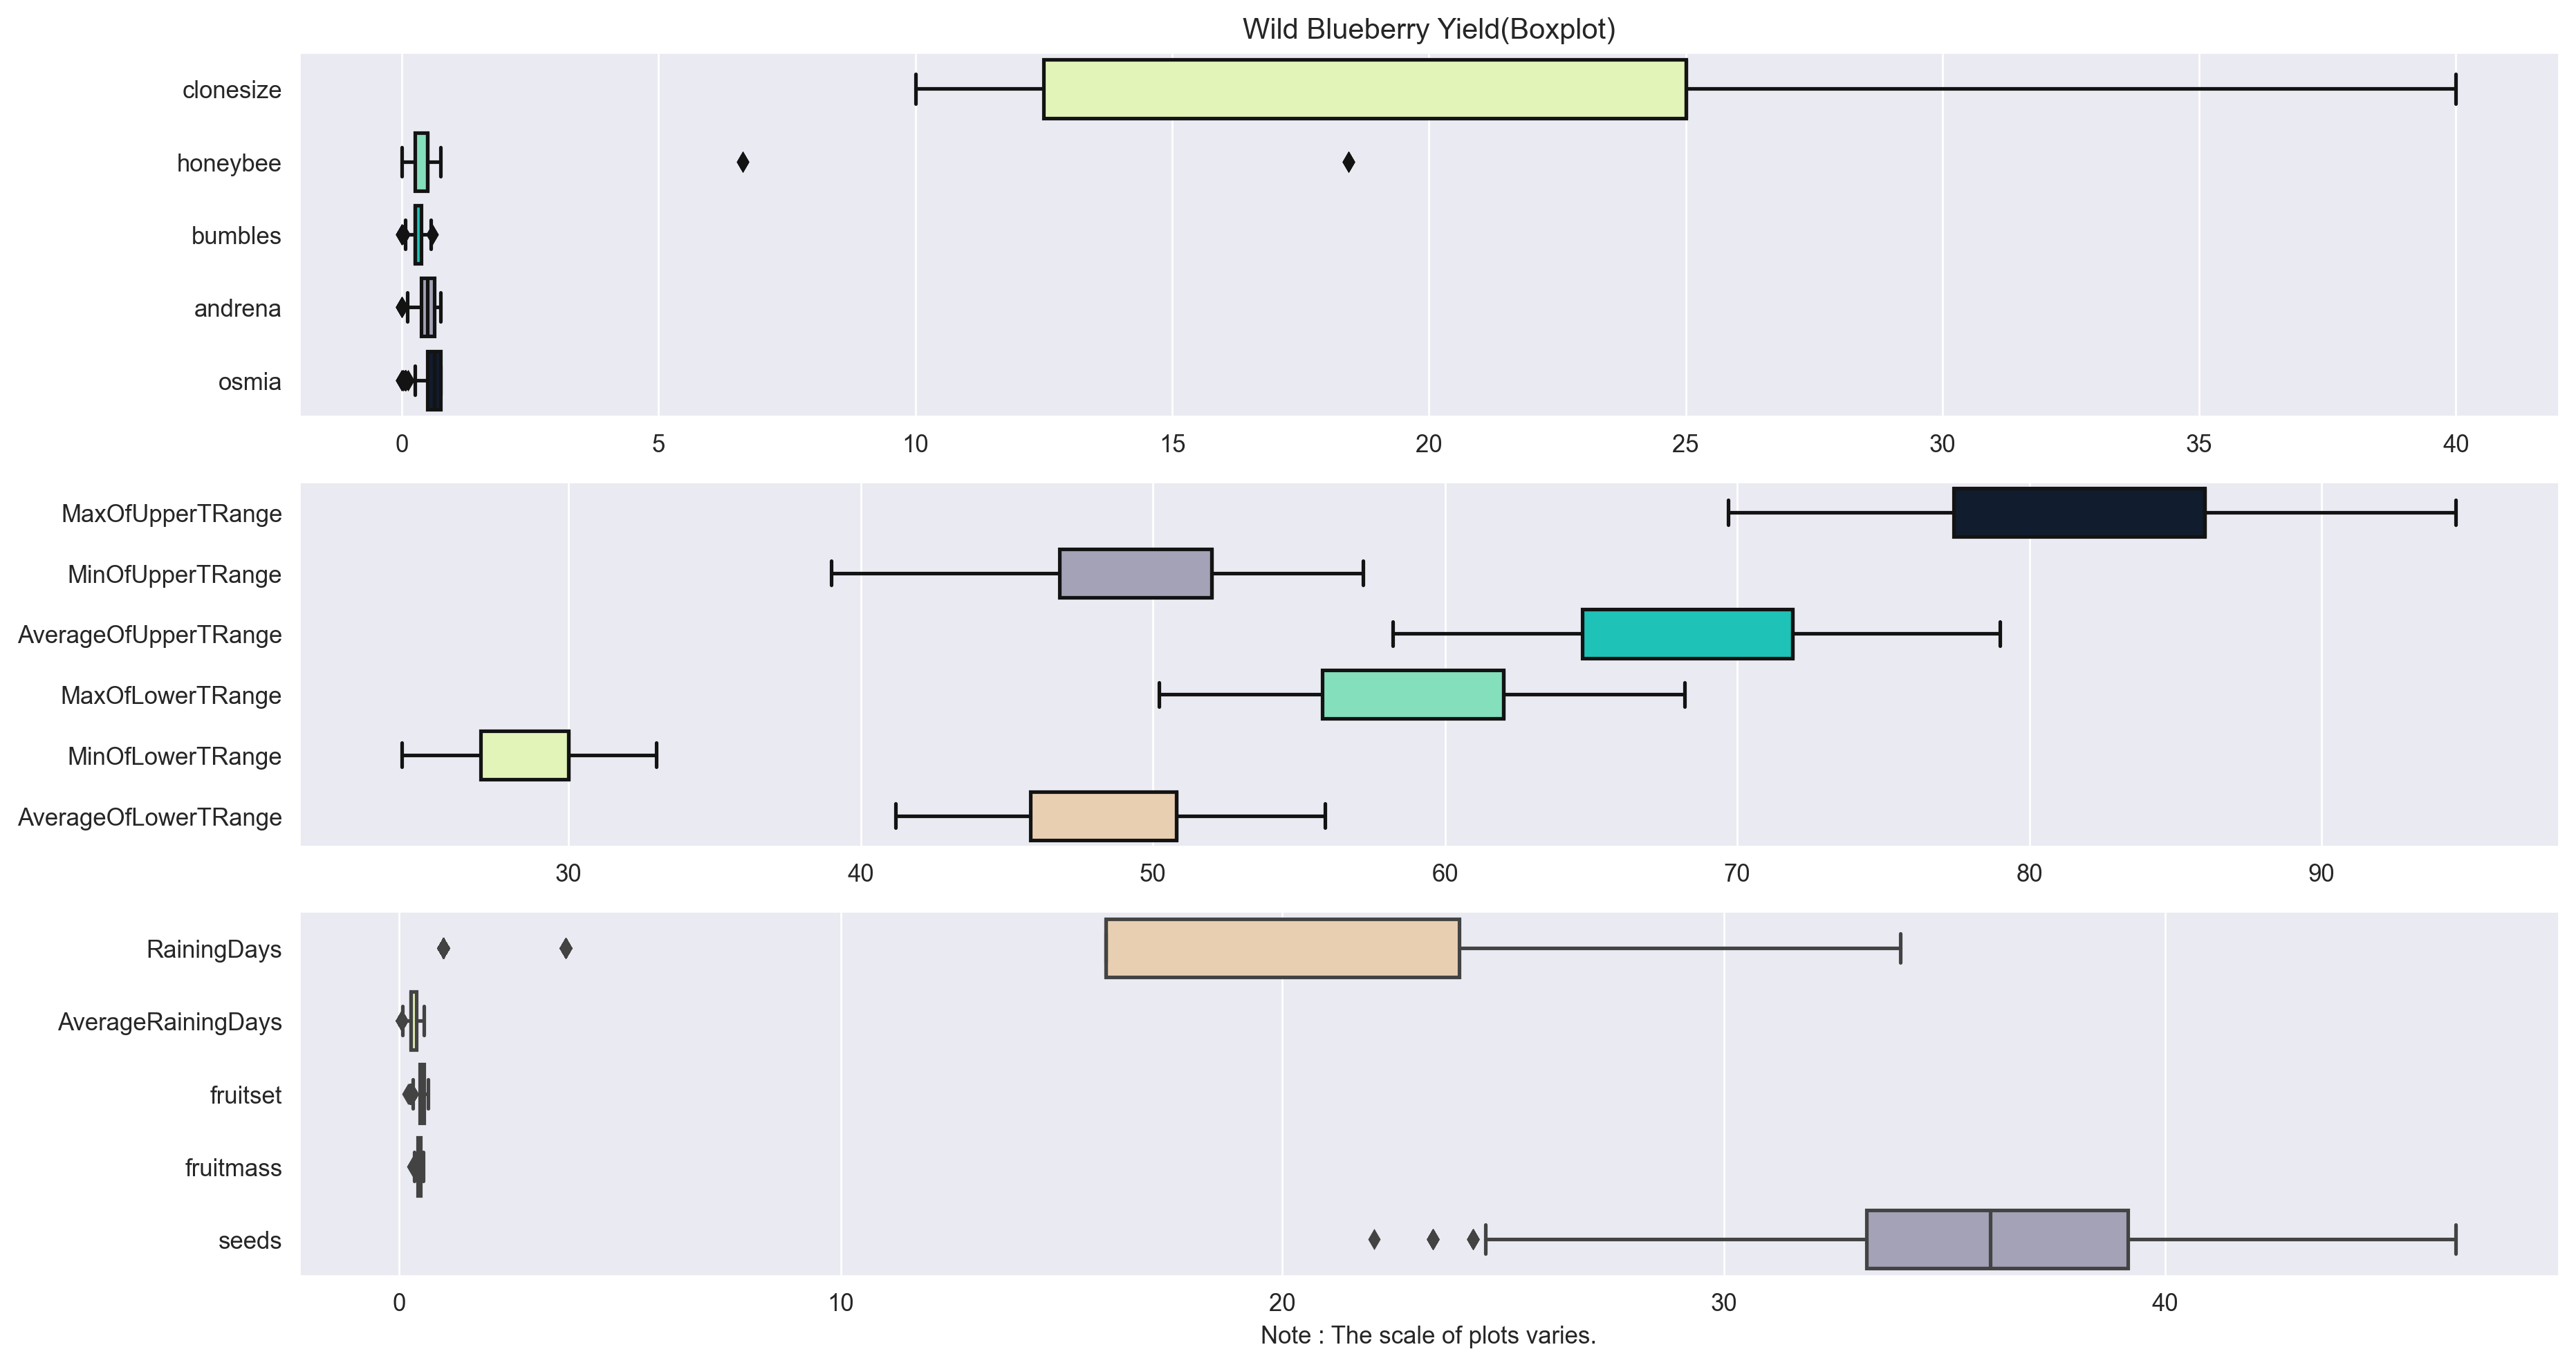

In [30]:
fig, ax = plt.subplots(nrows = 3, figsize = (15,8))

plt.setp(ax[0], title = 'Wild Blueberry Yield(Boxplot)')
sns.boxplot(data = top, orient = 'h', ax = ax[0], palette = ['#e6feae', '#75eebf', '#03ddcf', '#a09ebb', '#0c1b33'])

sns.boxplot(data = mid, orient = 'h', ax = ax[1], palette = ['#0c1b33', '#a09ebb', '#03ddcf', '#75eebf', '#e6feae', '#e84855'])

sns.boxplot(data = bottom, orient = 'h', ax = ax[2], palette = ['#e84855', '#e6feae', '#75eebf', '#03ddcf', '#a09ebb'])
plt.setp(ax[2], xlabel = 'Note : The scale of plots varies.')

plt.tight_layout()

#### Ploting Histplot

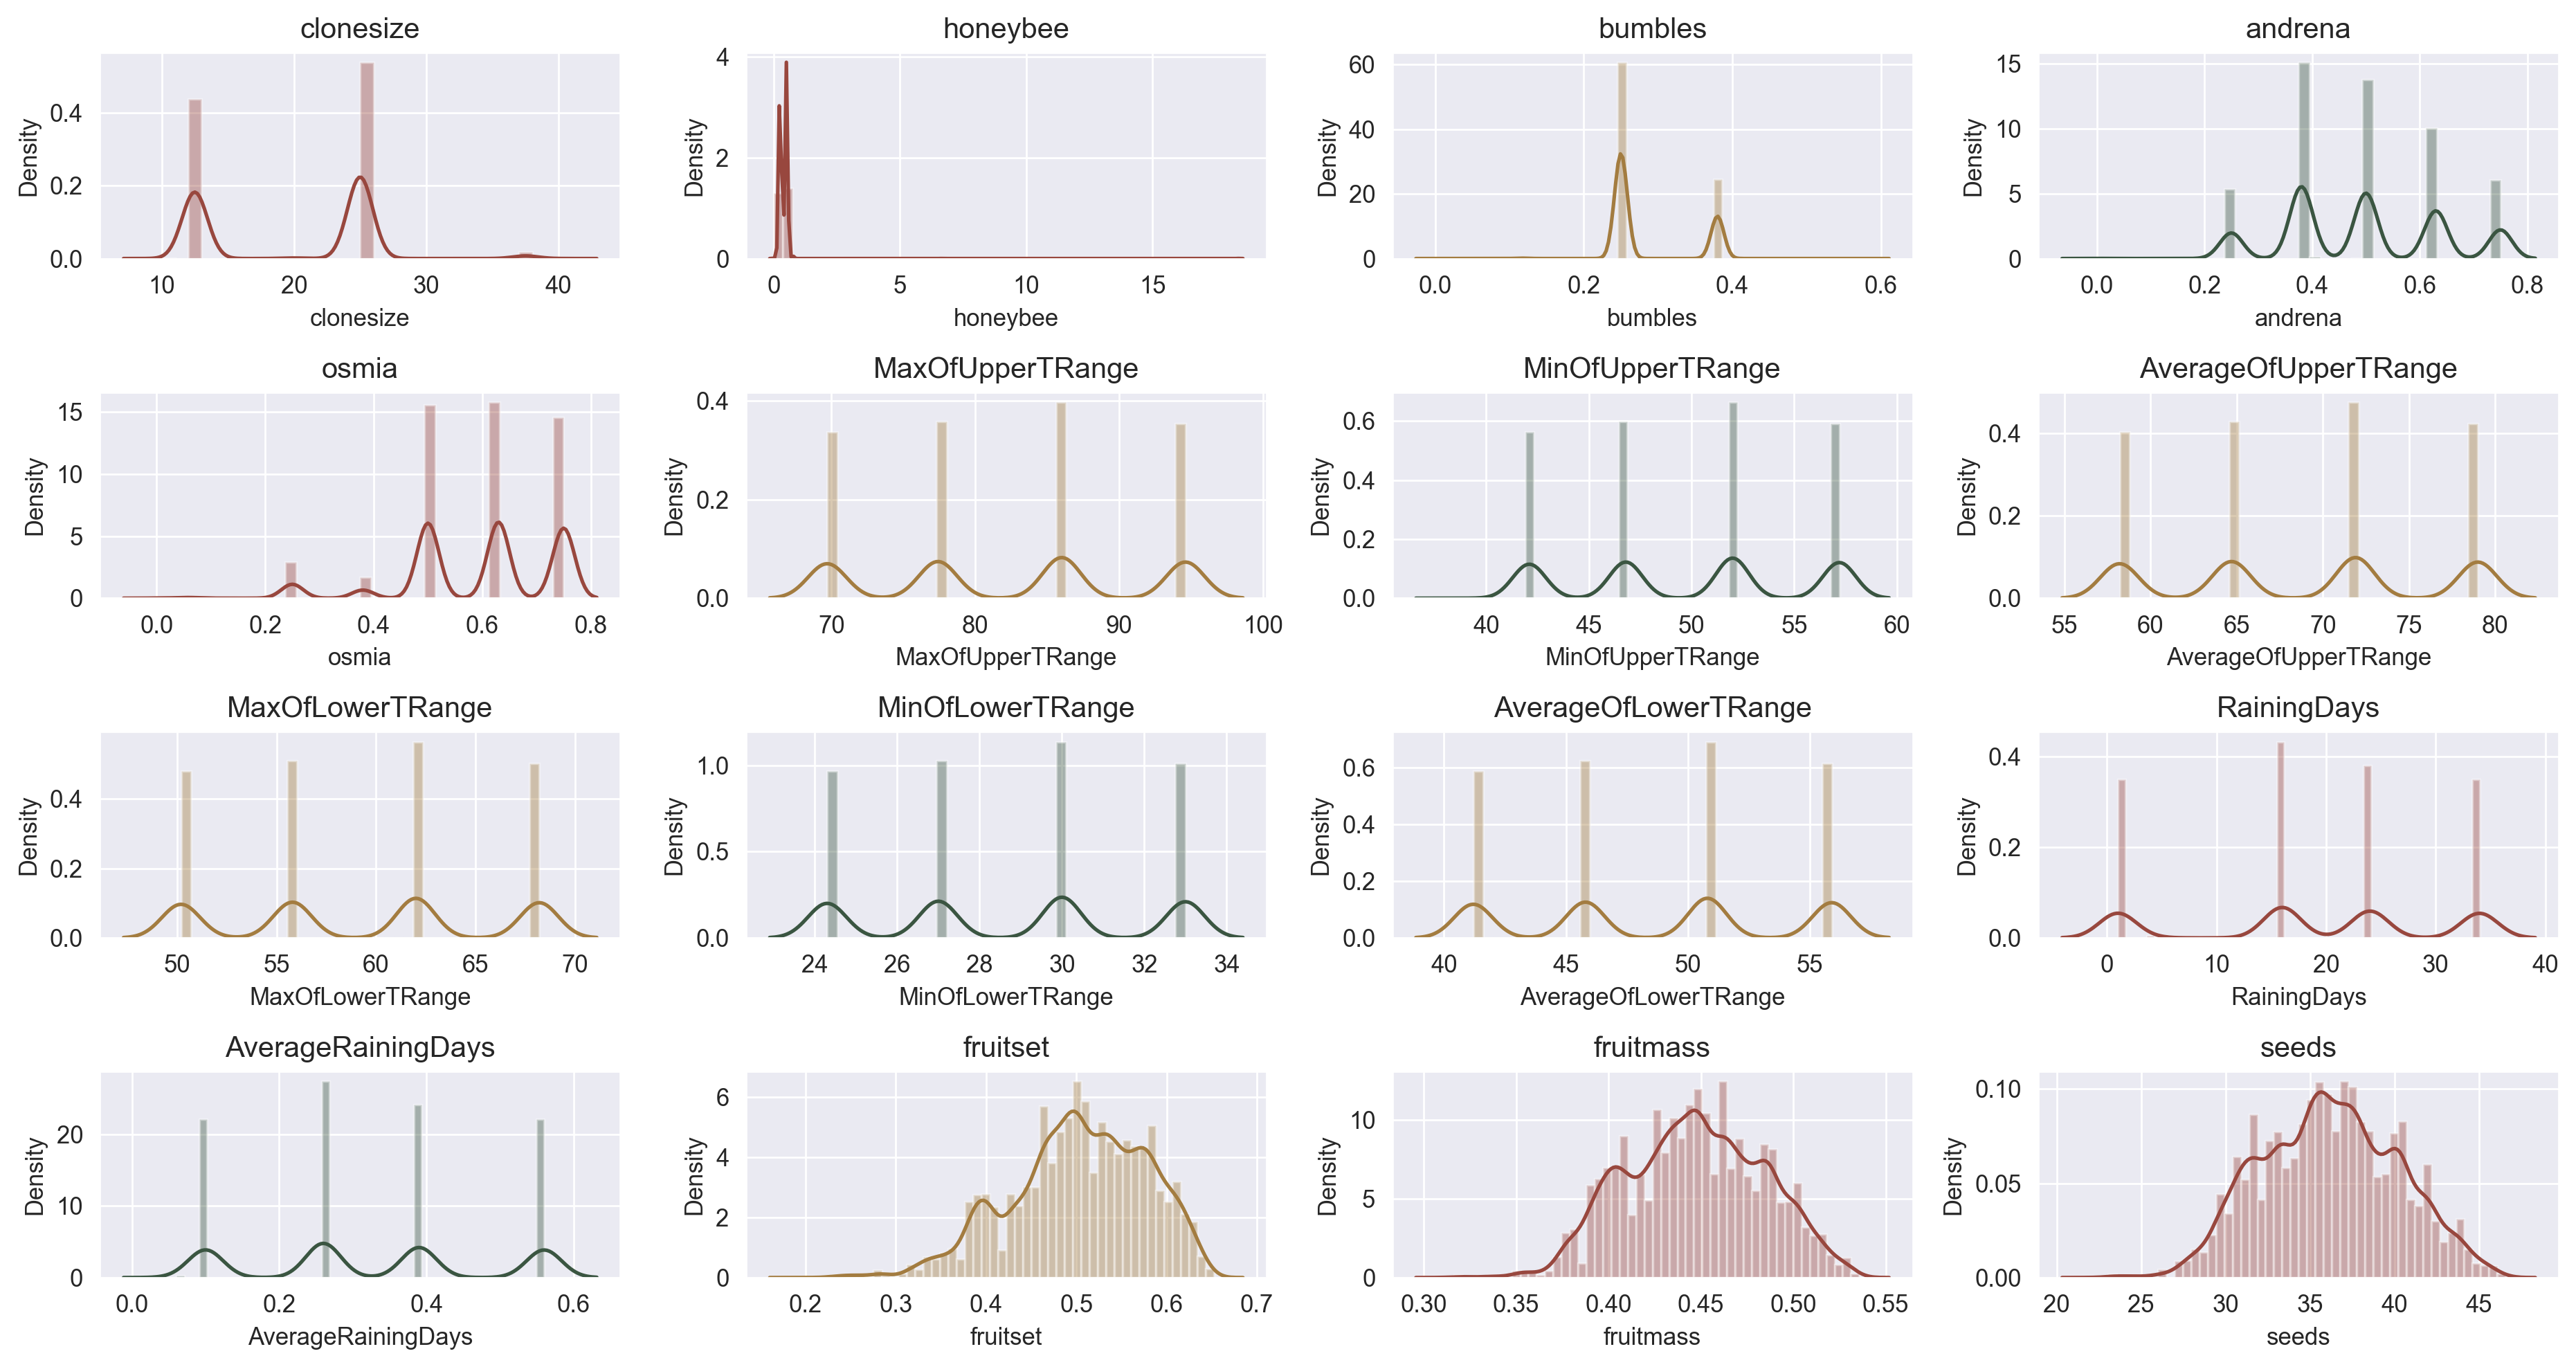

In [71]:
fig, ax = plt.subplots(4, 4, figsize = (15,8))

plt.setp(ax[0,0], title = 'clonesize')
sns.distplot(wby['clonesize'], ax = ax[0,0], color = '#98473e')

plt.setp(ax[0,1], title = 'honeybee')
sns.distplot(wby['honeybee'], ax = ax[0,1], color = '#98473e')

plt.setp(ax[0,2], title = 'bumbles')
sns.distplot(wby['bumbles'], ax = ax[0,2], color = '#a37c40')

plt.setp(ax[0,3], title = 'andrena')
sns.distplot(wby['andrena'], ax = ax[0,3], color = '#3a5541')

plt.setp(ax[1,0], title = 'osmia')
sns.distplot(wby['osmia'], ax = ax[1,0], color = '#98473e')

plt.setp(ax[1,1], title = 'MaxOfUpperTRange')
sns.distplot(wby['MaxOfUpperTRange'], ax = ax[1,1], color = '#a37c40')

plt.setp(ax[1,2], title = 'MinOfUpperTRange')
sns.distplot(wby['MinOfUpperTRange'], ax = ax[1,2], color = '#3a5541')

plt.setp(ax[1,3], title = 'AverageOfUpperTRange')
sns.distplot(wby['AverageOfUpperTRange'], ax = ax[1,3], color = '#a37c40')

plt.setp(ax[2,0], title = 'MaxOfLowerTRange')
sns.distplot(wby['MaxOfLowerTRange'], ax = ax[2,0], color = '#a37c40')

plt.setp(ax[2,1], title = 'MinOfLowerTRange')
sns.distplot(wby['MinOfLowerTRange'], ax = ax[2,1], color = '#3a5541')

plt.setp(ax[2,2], title = 'AverageOfLowerTRange')
sns.distplot(wby['AverageOfLowerTRange'], ax = ax[2,2], color = '#a37c40')

plt.setp(ax[2,3], title = 'RainingDays')
sns.distplot(wby['RainingDays'], ax = ax[2,3], color = '#98473e')

plt.setp(ax[3,0], title = 'AverageRainingDays')
sns.distplot(wby['AverageRainingDays'], ax = ax[3,0], color = '#3a5541')

plt.setp(ax[3,1], title = 'fruitset')
sns.distplot(wby['fruitset'], ax = ax[3,1], color = '#a37c40')

plt.setp(ax[3,2], title = 'fruitmass')
sns.distplot(wby['fruitmass'], ax = ax[3,2], color = '#98473e')

plt.setp(ax[3,3], title = 'seeds')
sns.distplot(wby['seeds'], ax = ax[3,3], color = '#98473e')

plt.tight_layout()

#### Ploting Pie-Plot

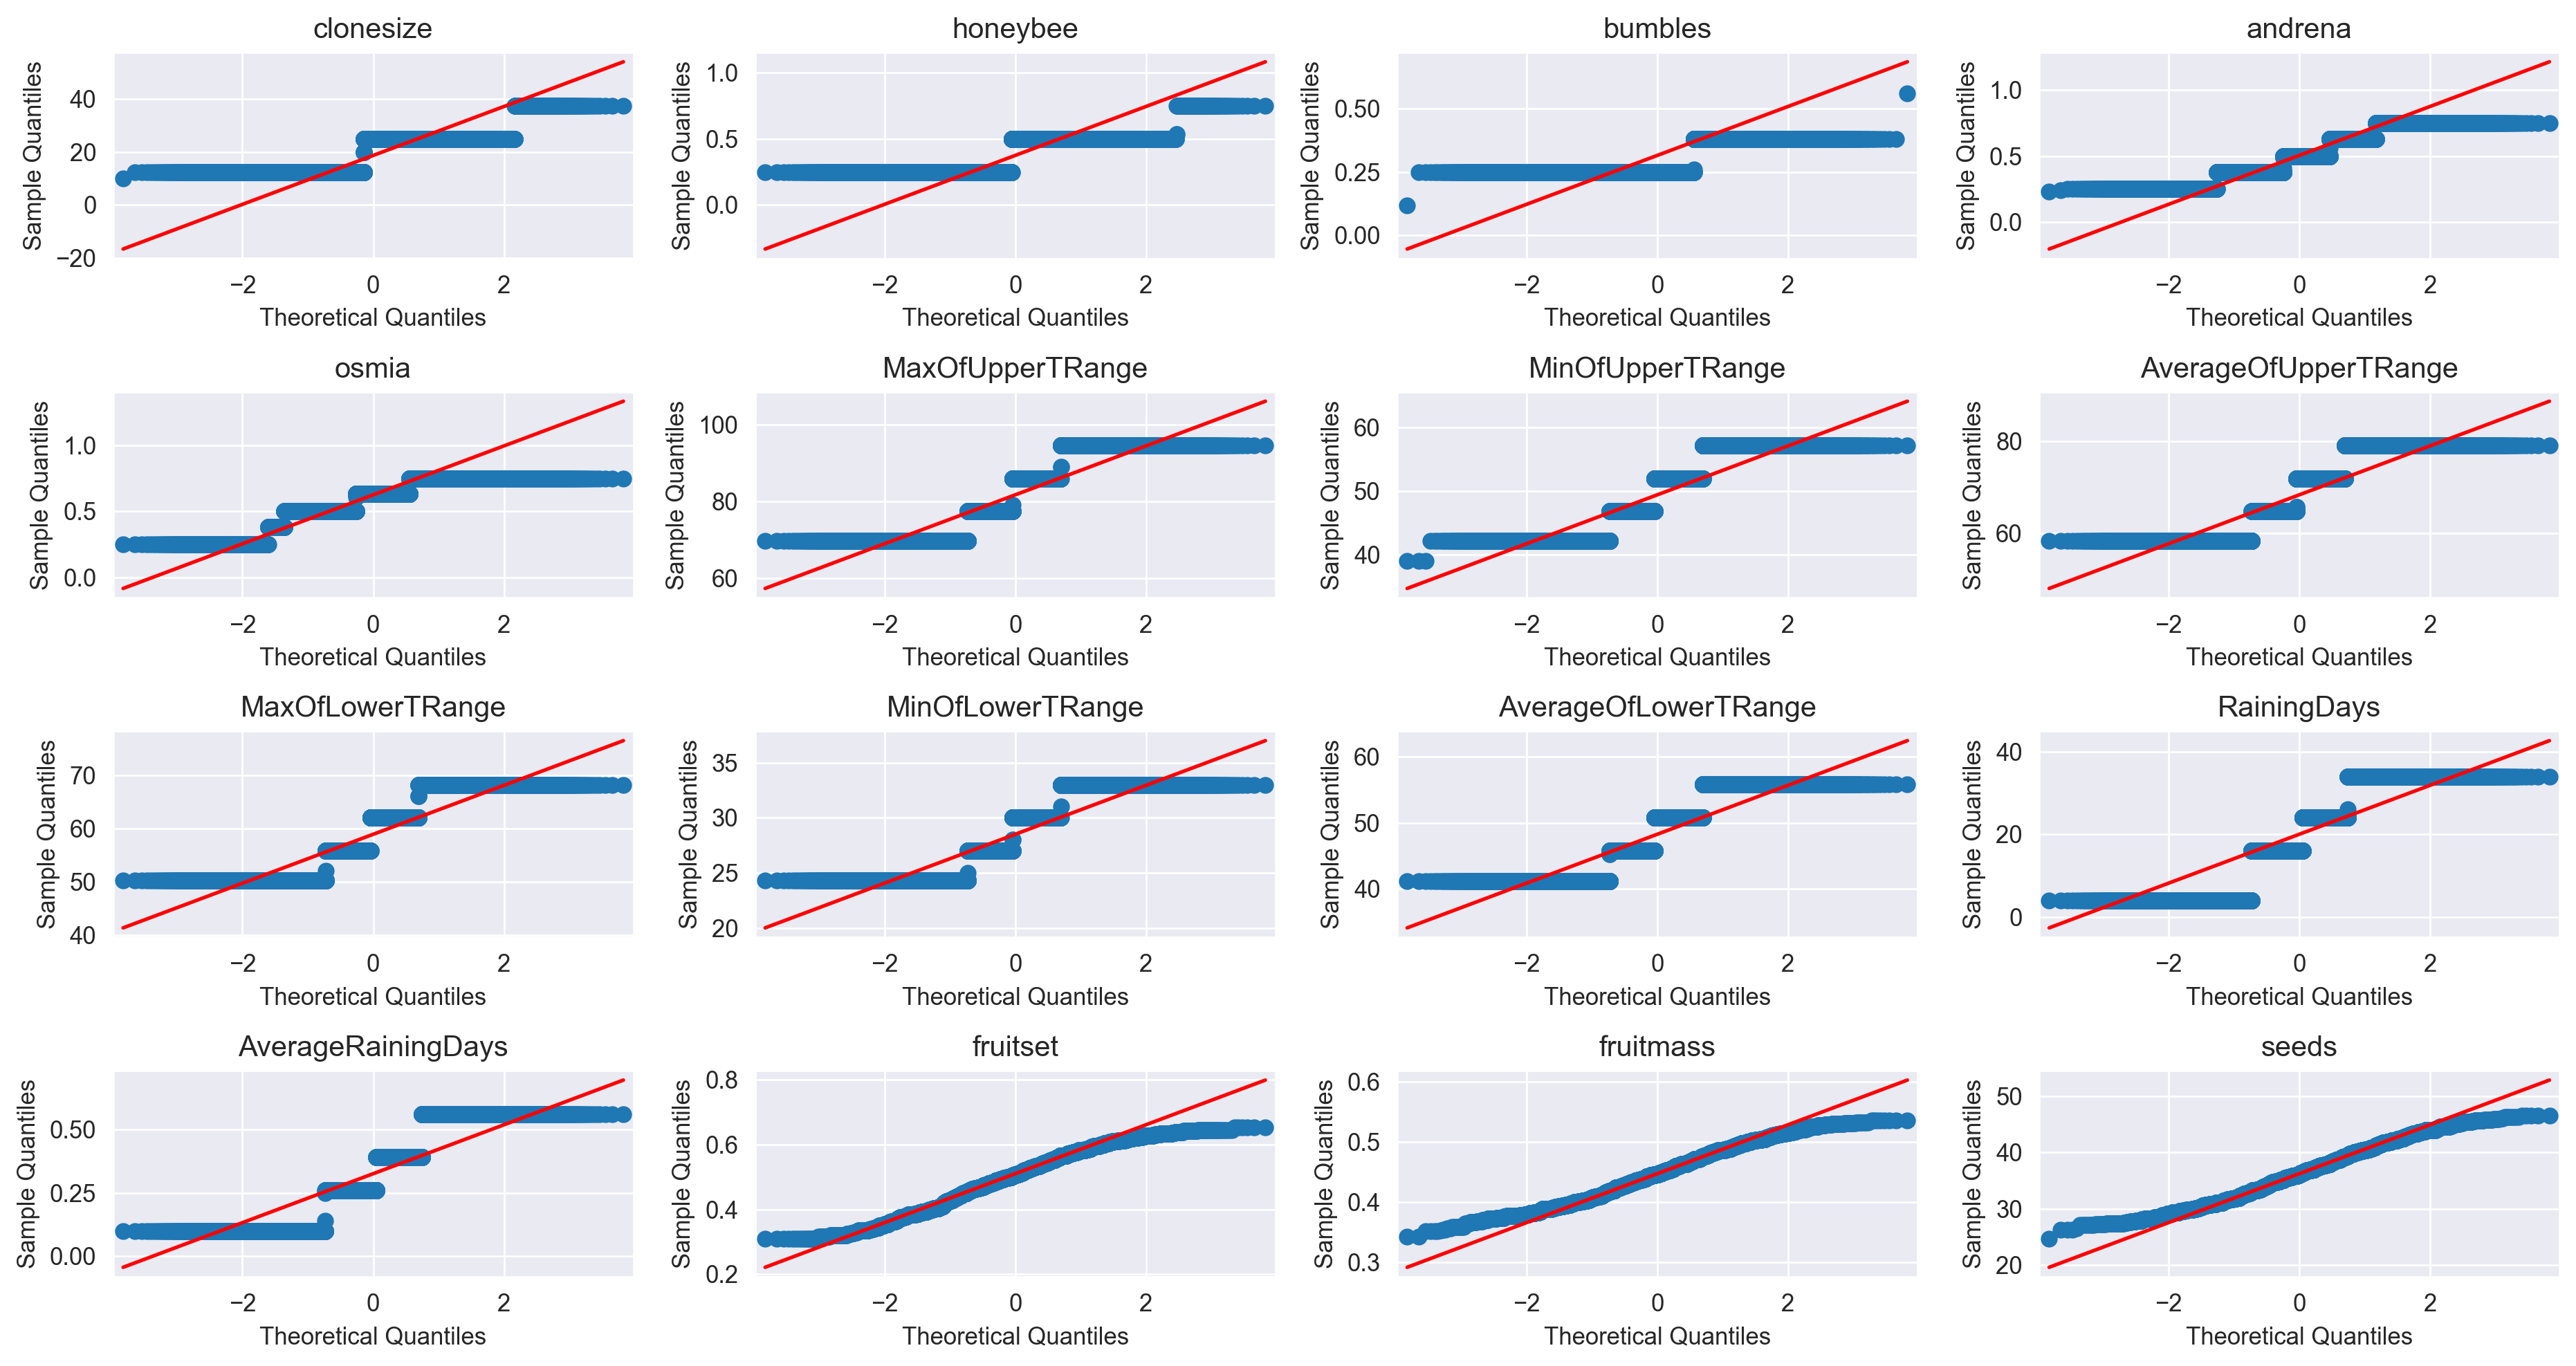

In [128]:
fig, ax = plt.subplots(4, 4, figsize = (15,8))

plt.setp(ax[0,0], title = 'clonesize')
sm.qqplot(wby['clonesize'], ax = ax[0,0], color = '#98473e', line = 'q')

plt.setp(ax[0,1], title = 'honeybee')
sm.qqplot(wby['honeybee'], ax = ax[0,1], color = '#98473e', line = 'q')

plt.setp(ax[0,2], title = 'bumbles')
sm.qqplot(wby['bumbles'], ax = ax[0,2], color = '#a37c40', line = 'q')

plt.setp(ax[0,3], title = 'andrena')
sm.qqplot(wby['andrena'], ax = ax[0,3], color = '#3a5541', line = 'q')

plt.setp(ax[1,0], title = 'osmia')
sm.qqplot(wby['osmia'], ax = ax[1,0], color = '#98473e', line = 'q')

plt.setp(ax[1,1], title = 'MaxOfUpperTRange')
sm.qqplot(wby['MaxOfUpperTRange'], ax = ax[1,1], color = '#a37c40', line = 'q')

plt.setp(ax[1,2], title = 'MinOfUpperTRange')
sm.qqplot(wby['MinOfUpperTRange'], ax = ax[1,2], color = '#3a5541', line = 'q')

plt.setp(ax[1,3], title = 'AverageOfUpperTRange')
sm.qqplot(wby['AverageOfUpperTRange'], ax = ax[1,3], color = '#a37c40', line = 'q')

plt.setp(ax[2,0], title = 'MaxOfLowerTRange')
sm.qqplot(wby['MaxOfLowerTRange'], ax = ax[2,0], color = '#a37c40', line = 'q')

plt.setp(ax[2,1], title = 'MinOfLowerTRange')
sm.qqplot(wby['MinOfLowerTRange'], ax = ax[2,1], color = '#3a5541', line = 'q')

plt.setp(ax[2,2], title = 'AverageOfLowerTRange')
sm.qqplot(wby['AverageOfLowerTRange'], ax = ax[2,2], color = '#a37c40', line = 'q')

plt.setp(ax[2,3], title = 'RainingDays')
sm.qqplot(wby['RainingDays'], ax = ax[2,3], color = '#98473e', line = 'q')

plt.setp(ax[3,0], title = 'AverageRainingDays')
sm.qqplot(wby['AverageRainingDays'], ax = ax[3,0], color = '#3a5541', line = 'q')

plt.setp(ax[3,1], title = 'fruitset')
sm.qqplot(wby['fruitset'], ax = ax[3,1], color = '#a37c40', line = 'q')

plt.setp(ax[3,2], title = 'fruitmass')
sm.qqplot(wby['fruitmass'], ax = ax[3,2], color = '#98473e', line = 'q')

plt.setp(ax[3,3], title = 'seeds')
sm.qqplot(wby['seeds'], ax = ax[3,3], color = '#98473e', line = 'q')

plt.tight_layout()

### Correlation Analysis

In [80]:
ca = wby.drop(columns=['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange'])

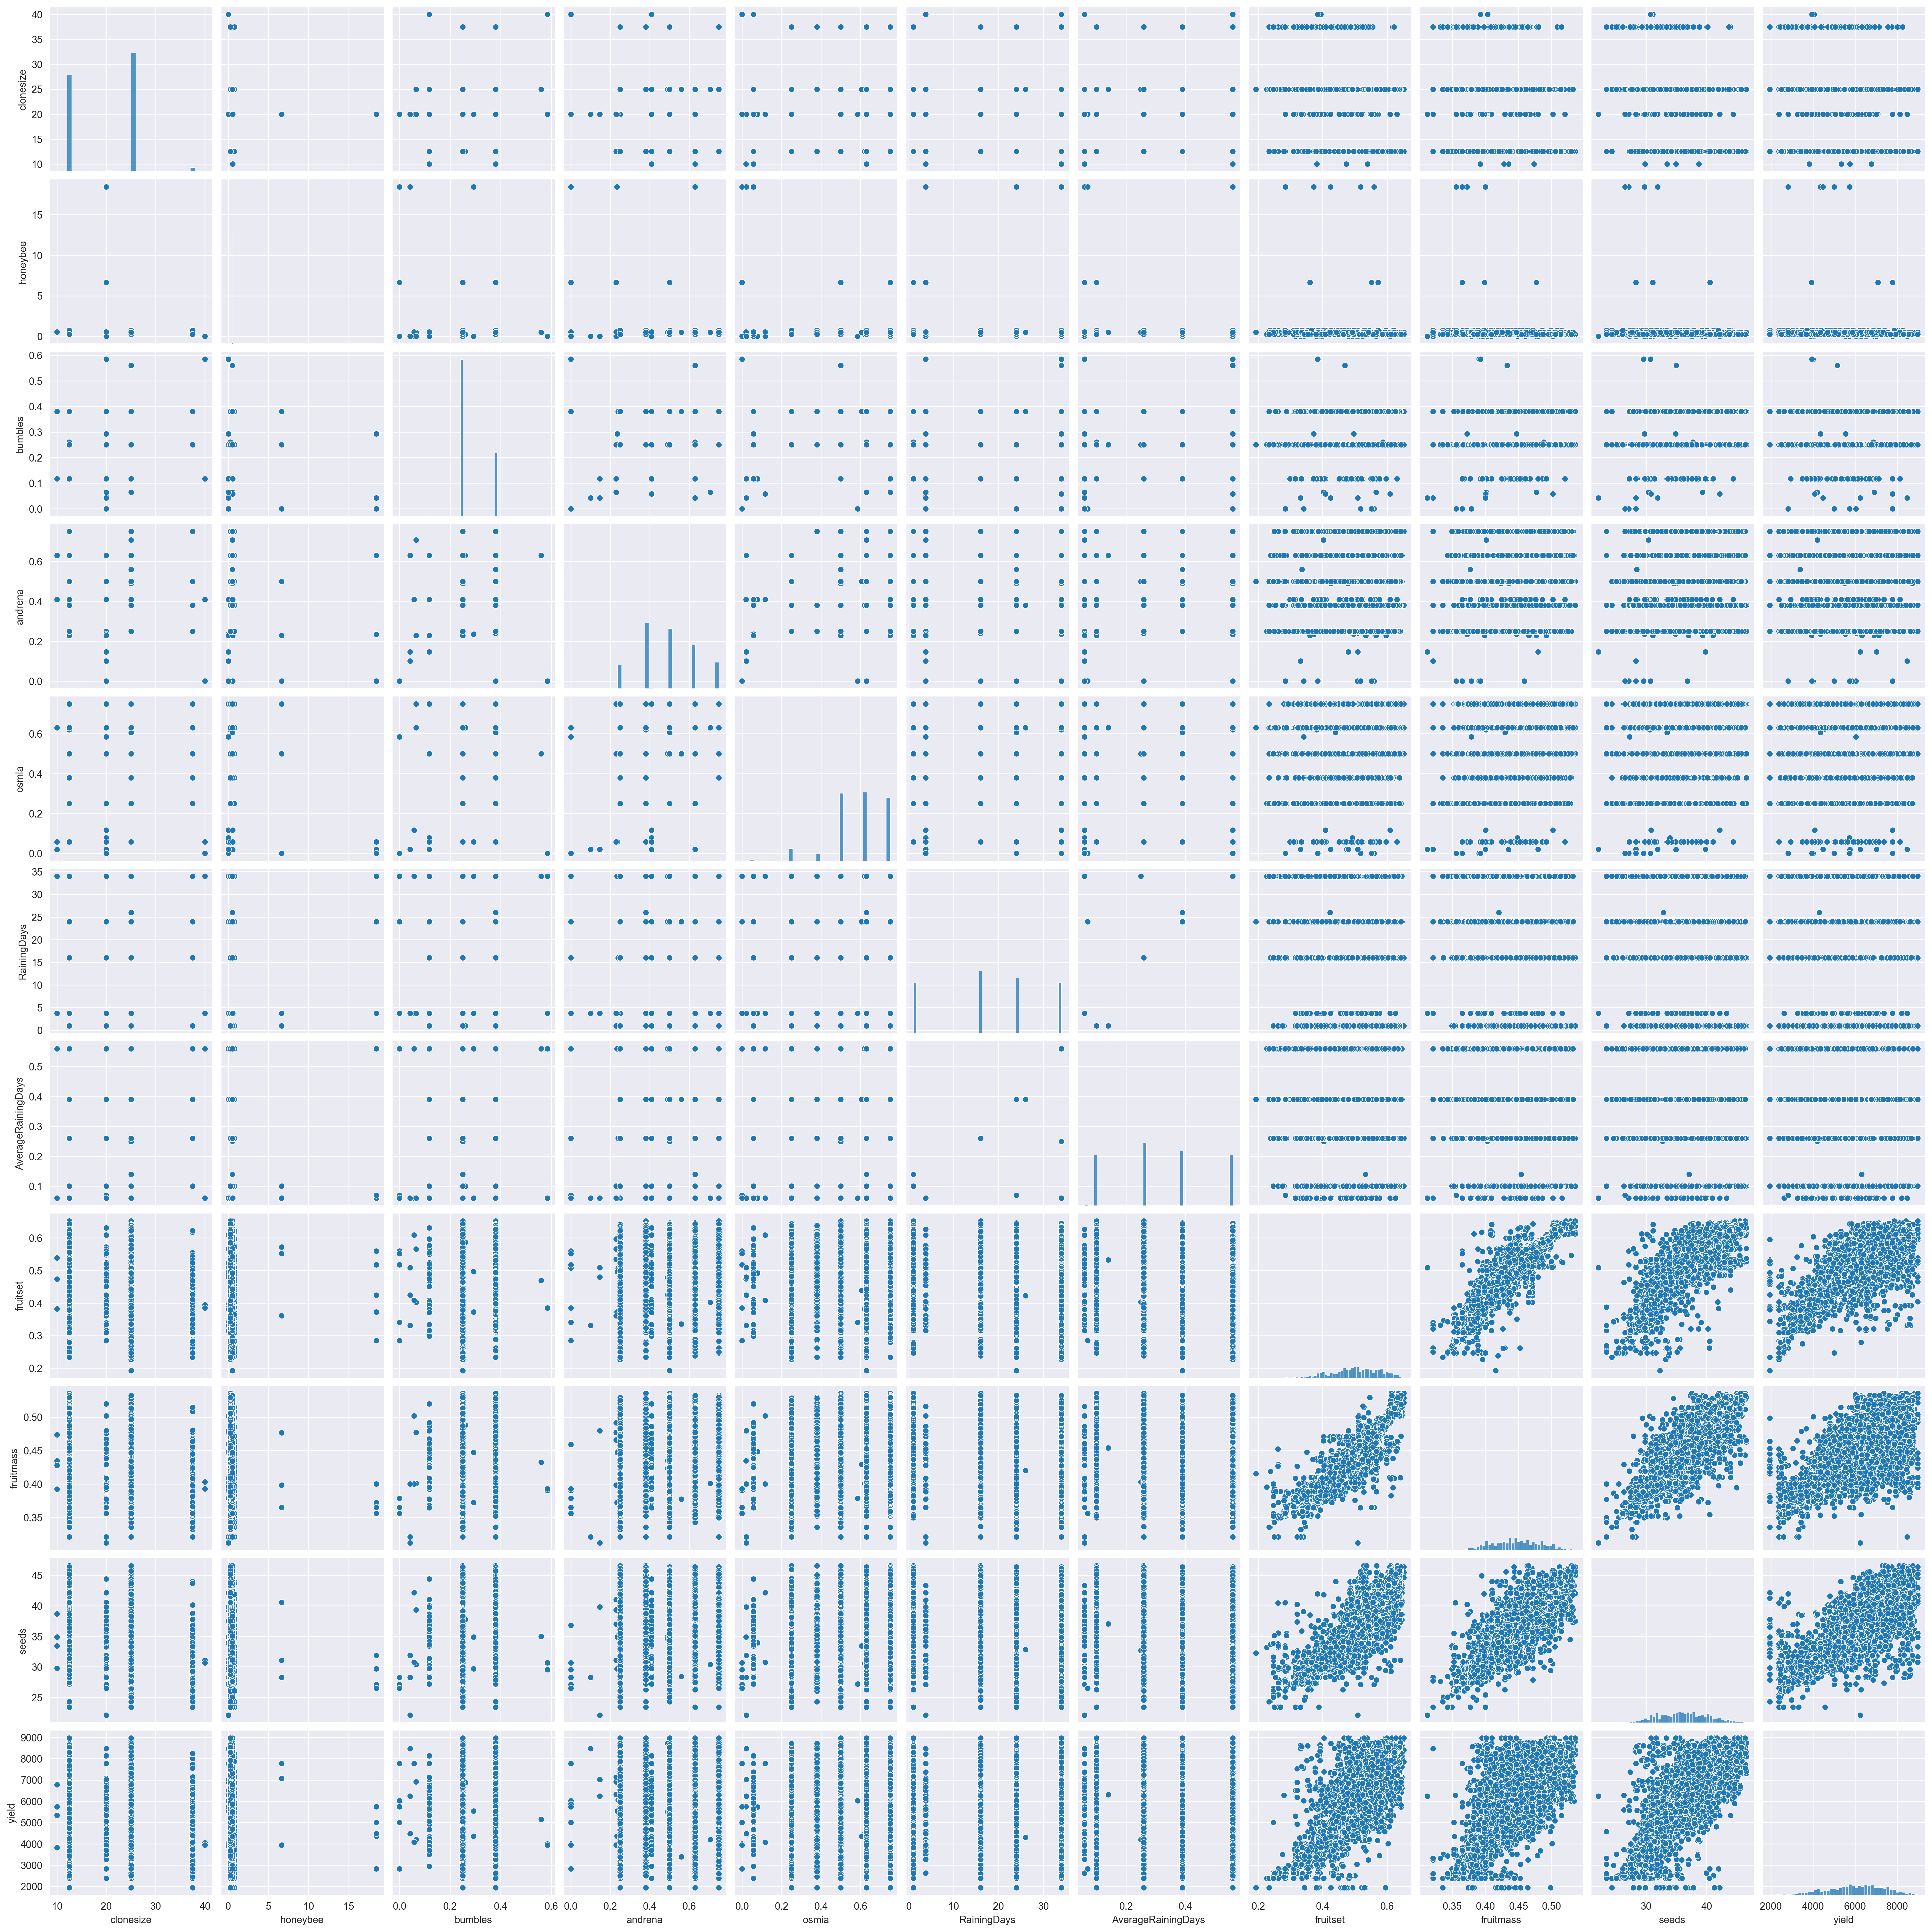

In [81]:
sns.pairplot(ca)

plt.show()

<AxesSubplot:>

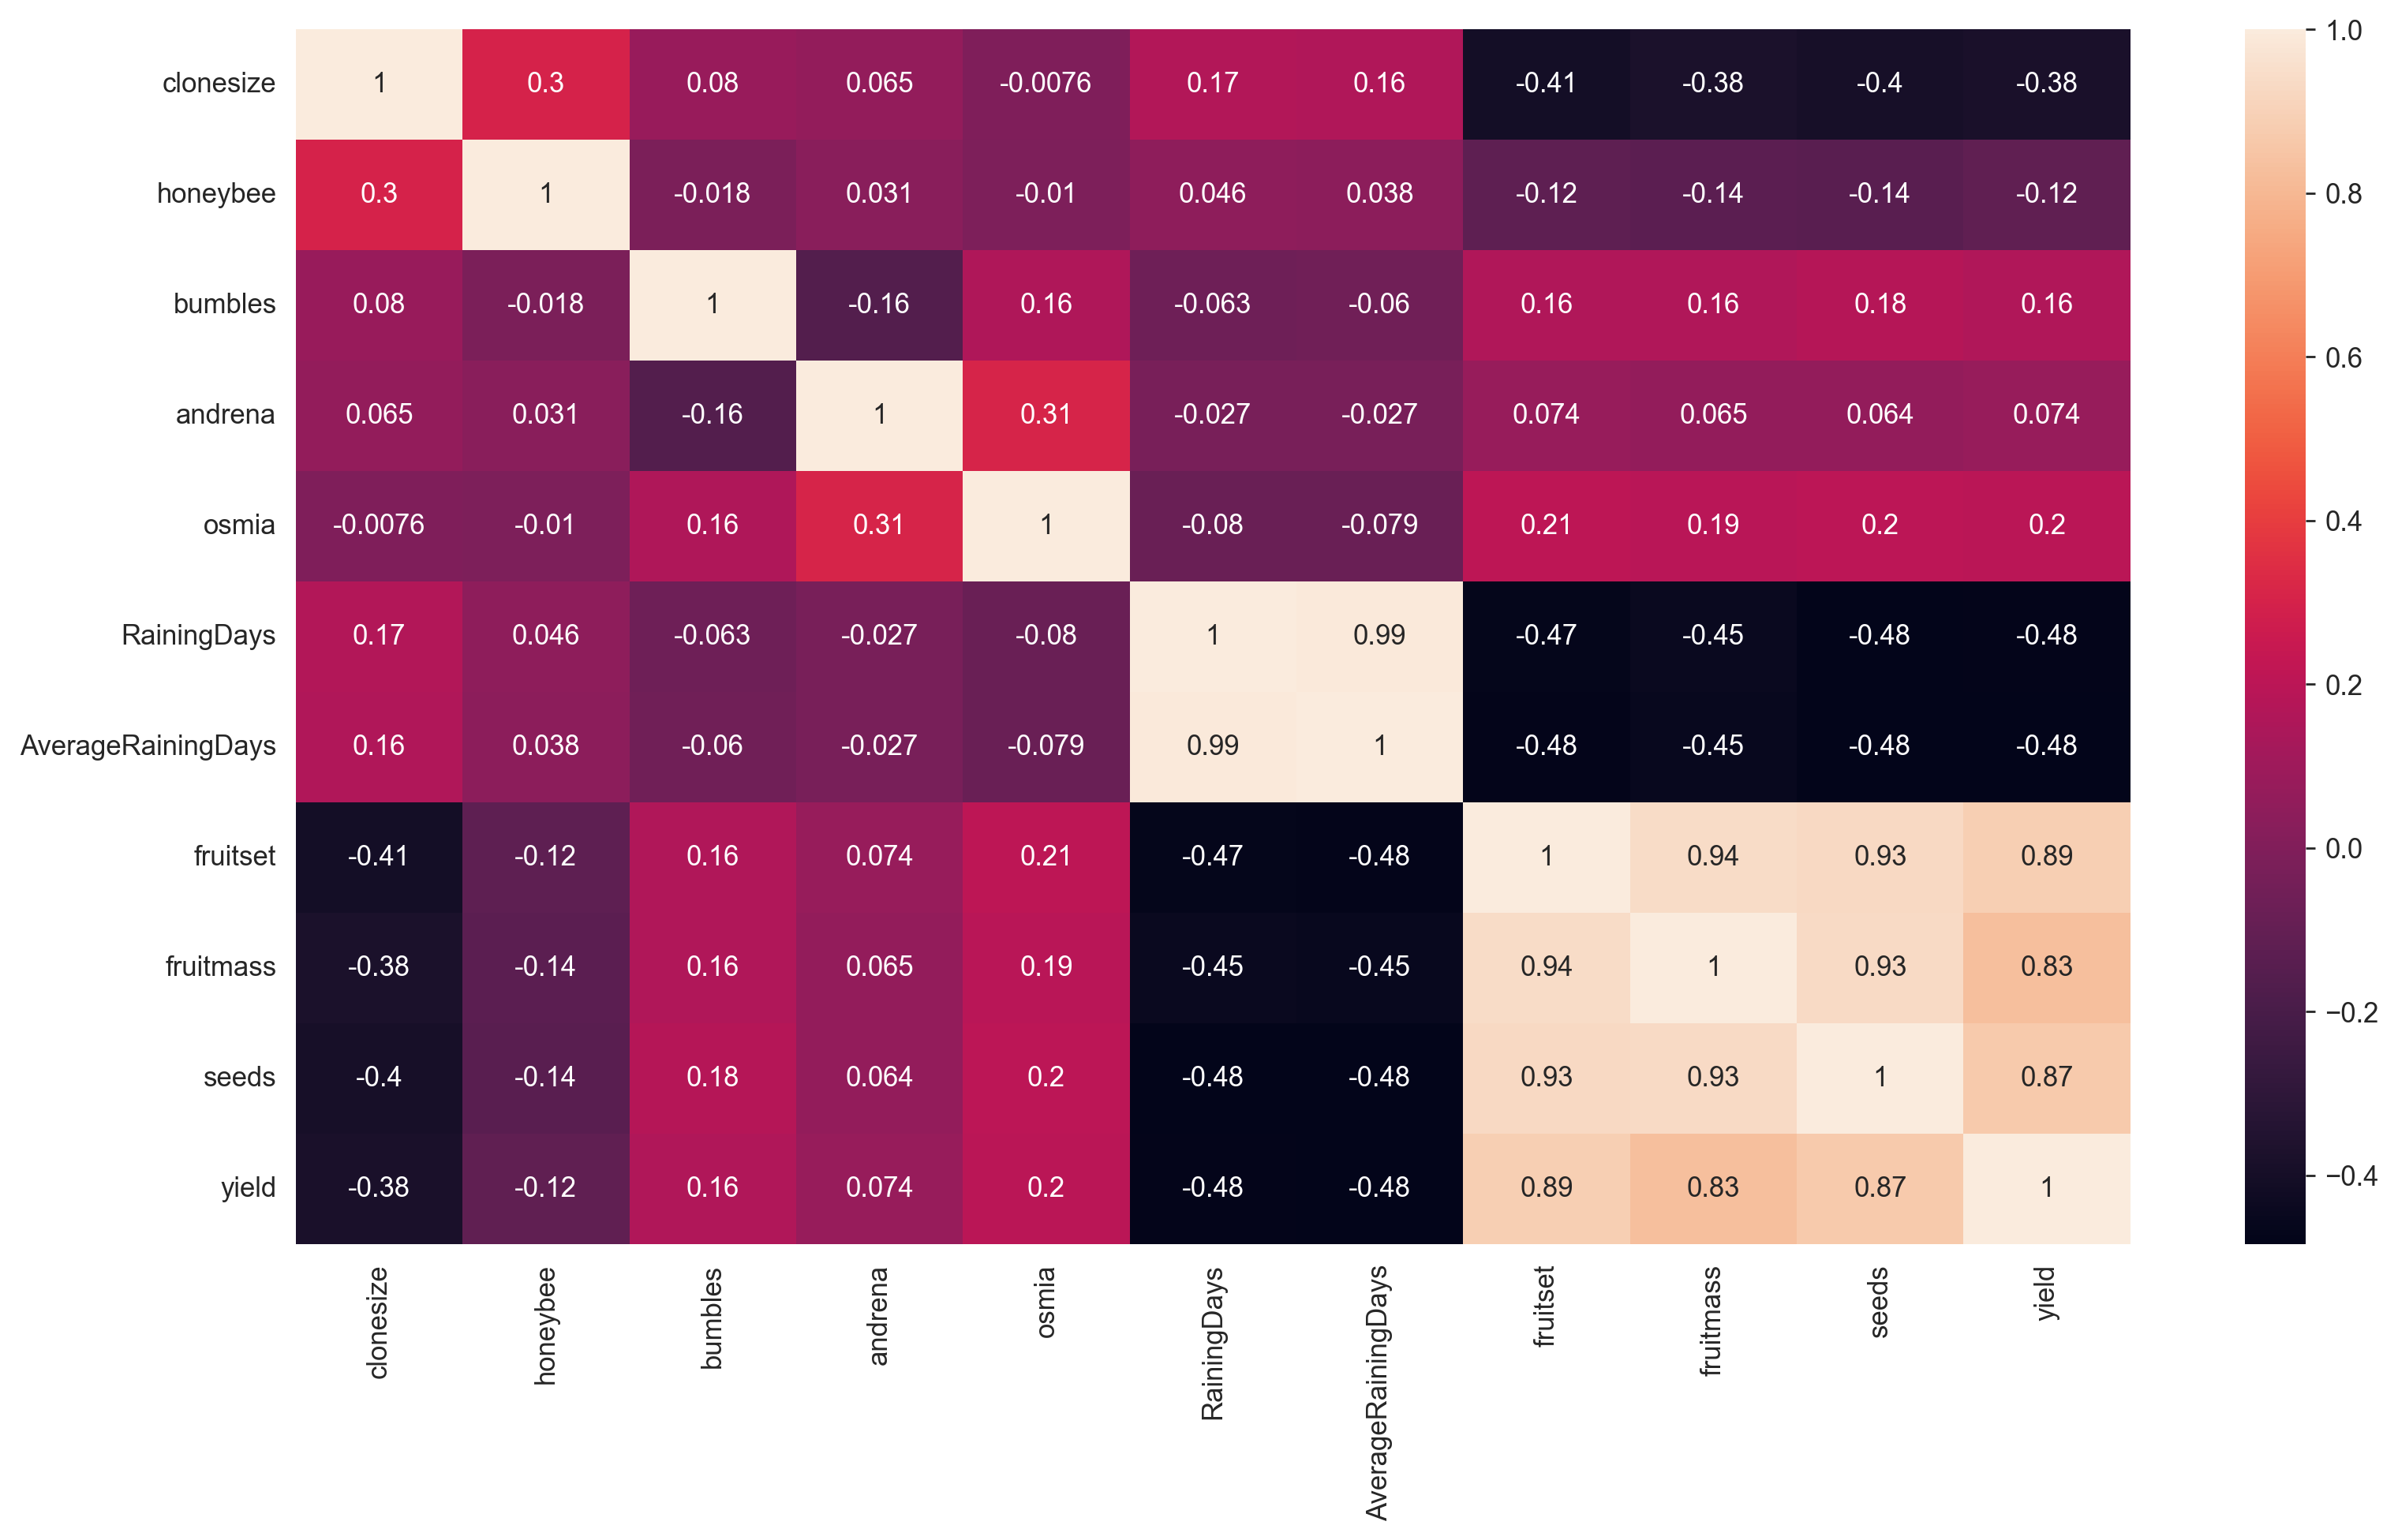

In [82]:
sns.heatmap(ca.corr(), annot = True)

### Outlier Detection

In [83]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100
        
        percentage = round(percentage, 2)

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [84]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [85]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Resizing Figsize

In [86]:
plt.rcParams['figure.figsize'] = (12,2)

#### Outlier Percentage (Before)

In [87]:
outlier_percentage(wby)

clonesize : 0.0 %
honeybee : 0.05 %
bumbles : 0.07 %
andrena : 0.05 %
osmia : 0.37 %
MaxOfUpperTRange : 0.0 %
MinOfUpperTRange : 0.0 %
AverageOfUpperTRange : 0.0 %
MaxOfLowerTRange : 0.0 %
MinOfLowerTRange : 0.0 %
AverageOfLowerTRange : 0.0 %
RainingDays : 23.34 %
AverageRainingDays : 0.32 %
fruitset : 0.63 %
fruitmass : 0.15 %
seeds : 0.16 %
yield : 0.17 %


#### Replacing Outlier in RainingDays Column

<AxesSubplot:>

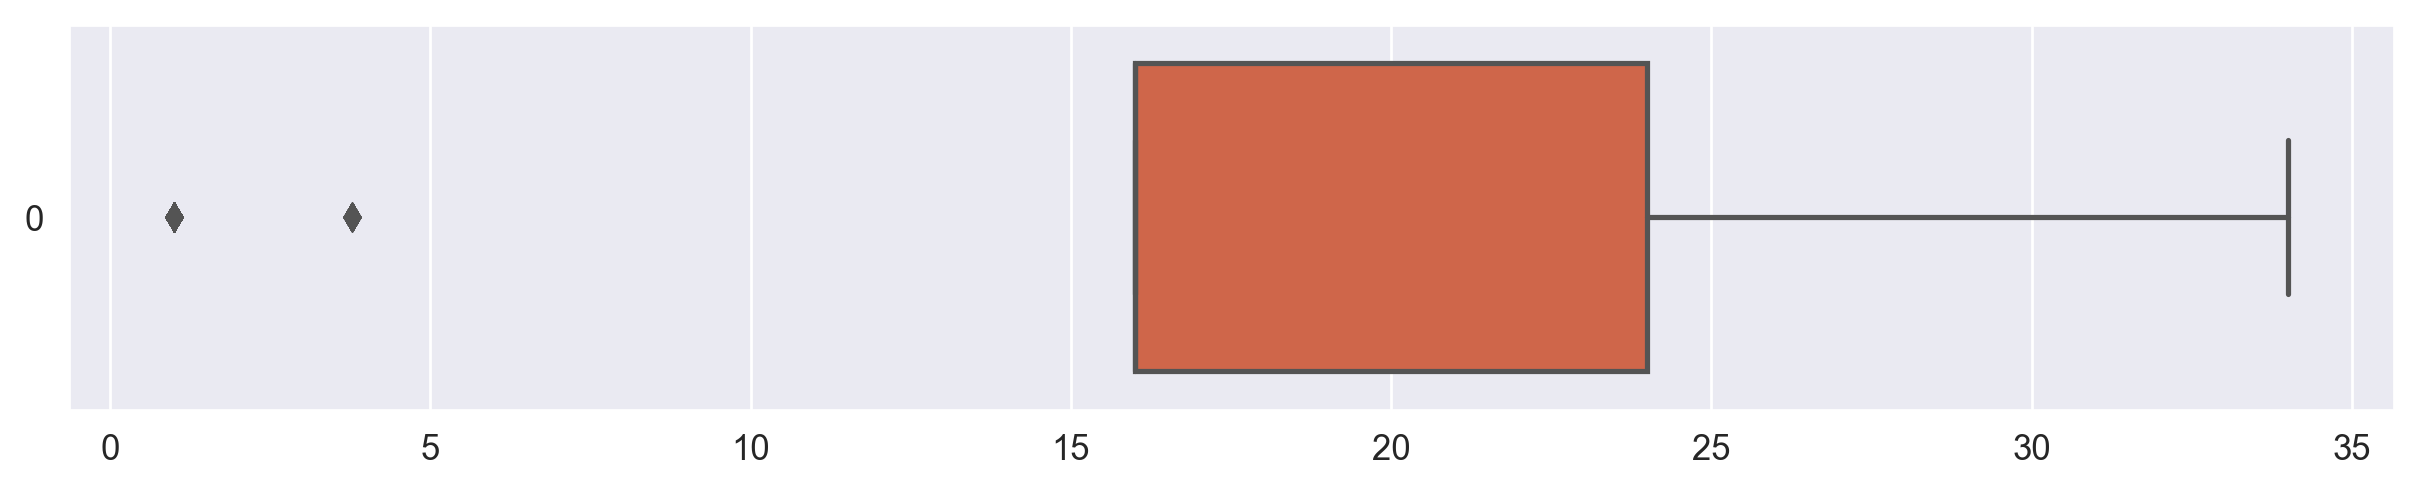

In [88]:
sns.boxplot(wby['RainingDays'], orient = 'h', color = '#e55934')

In [89]:
replace_outlier_extream(wby, 'RainingDays')

<AxesSubplot:>

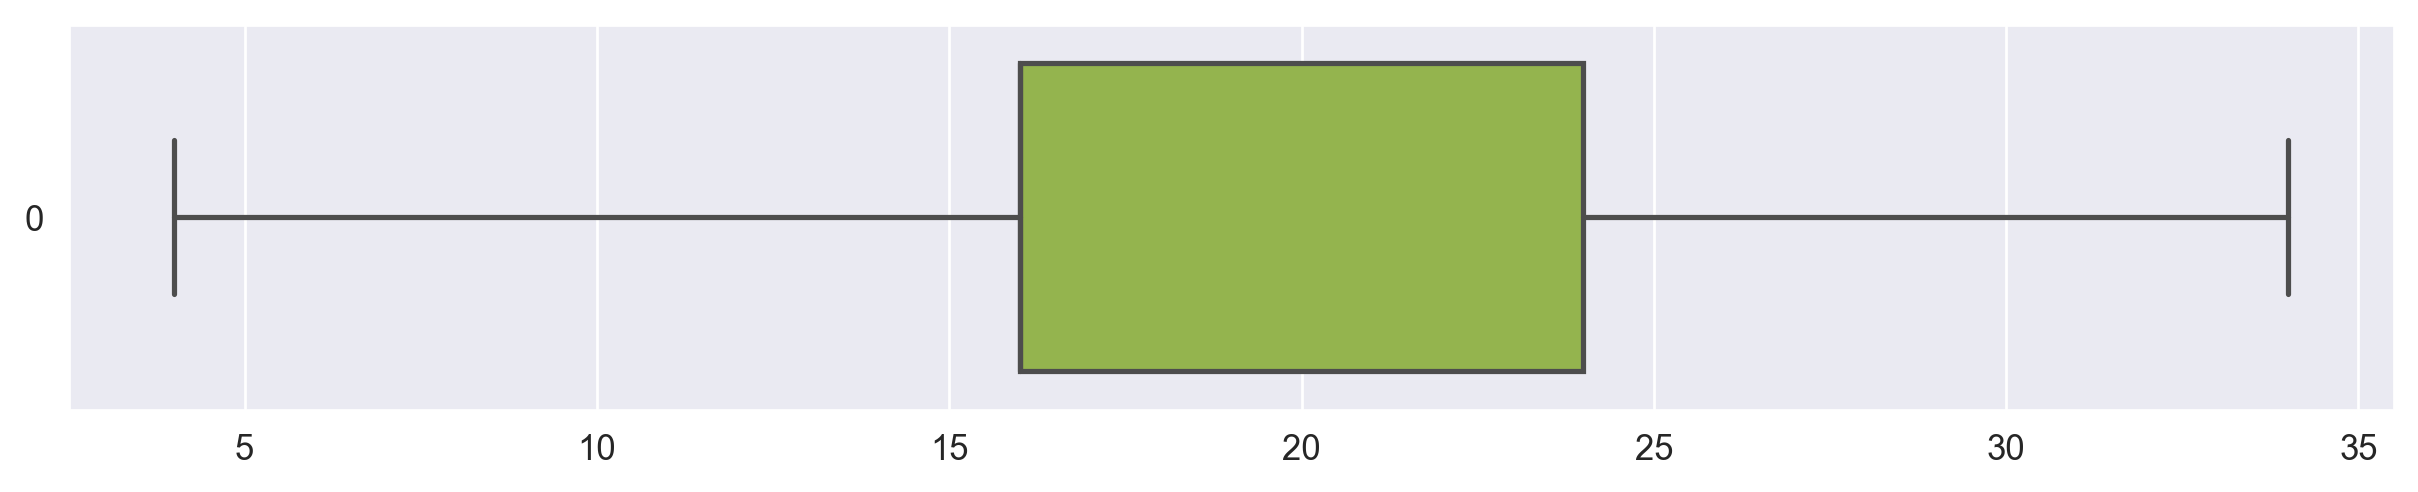

In [90]:
sns.boxplot(wby['RainingDays'], orient = 'h', color = '#9bc53d')

#### Removing Outlier in honeybee Column

<AxesSubplot:>

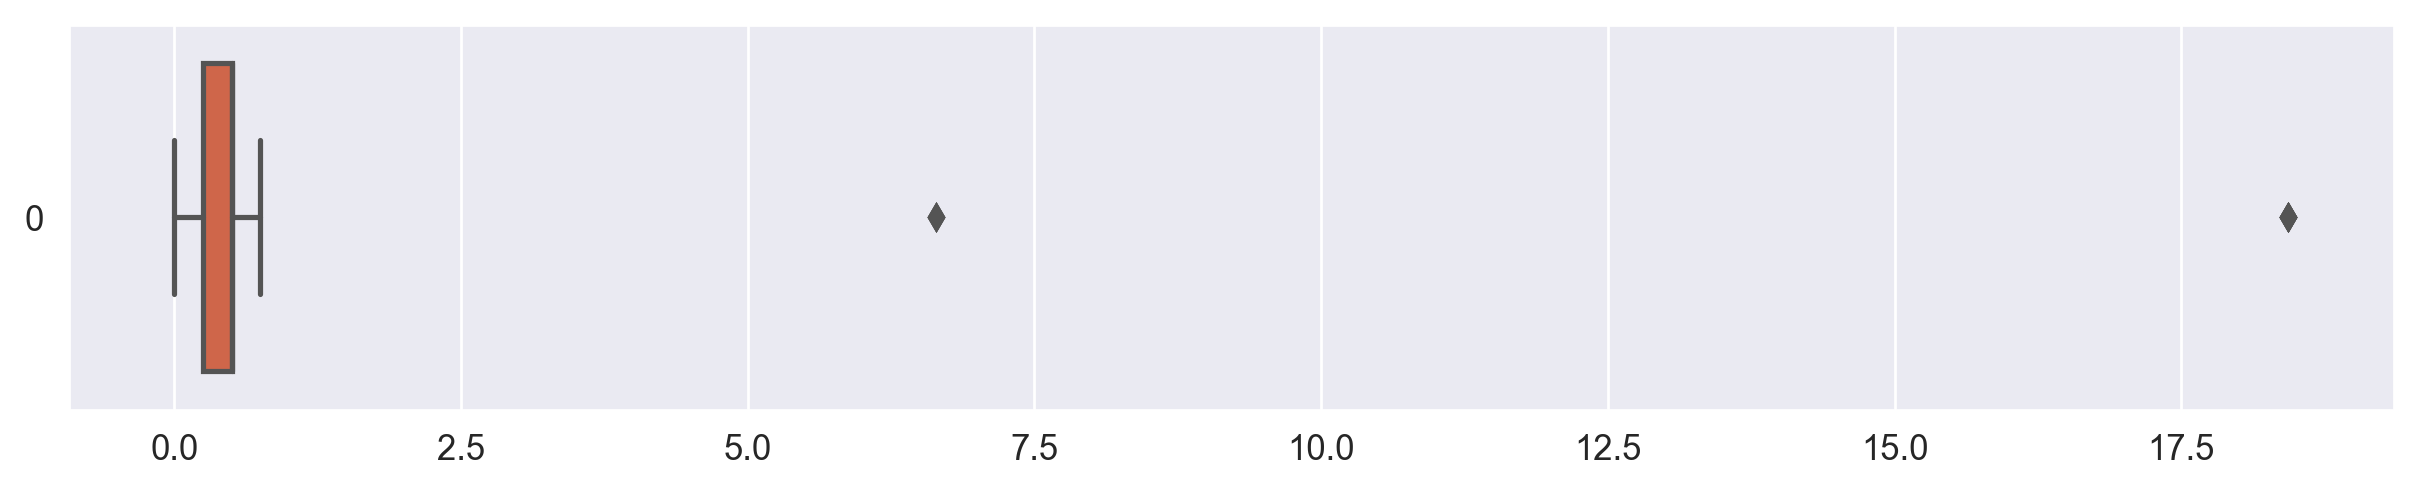

In [91]:
sns.boxplot(wby['honeybee'], orient = 'h', color = '#e55934')

In [92]:
wby = remove_outlier(wby, 'honeybee')

<AxesSubplot:>

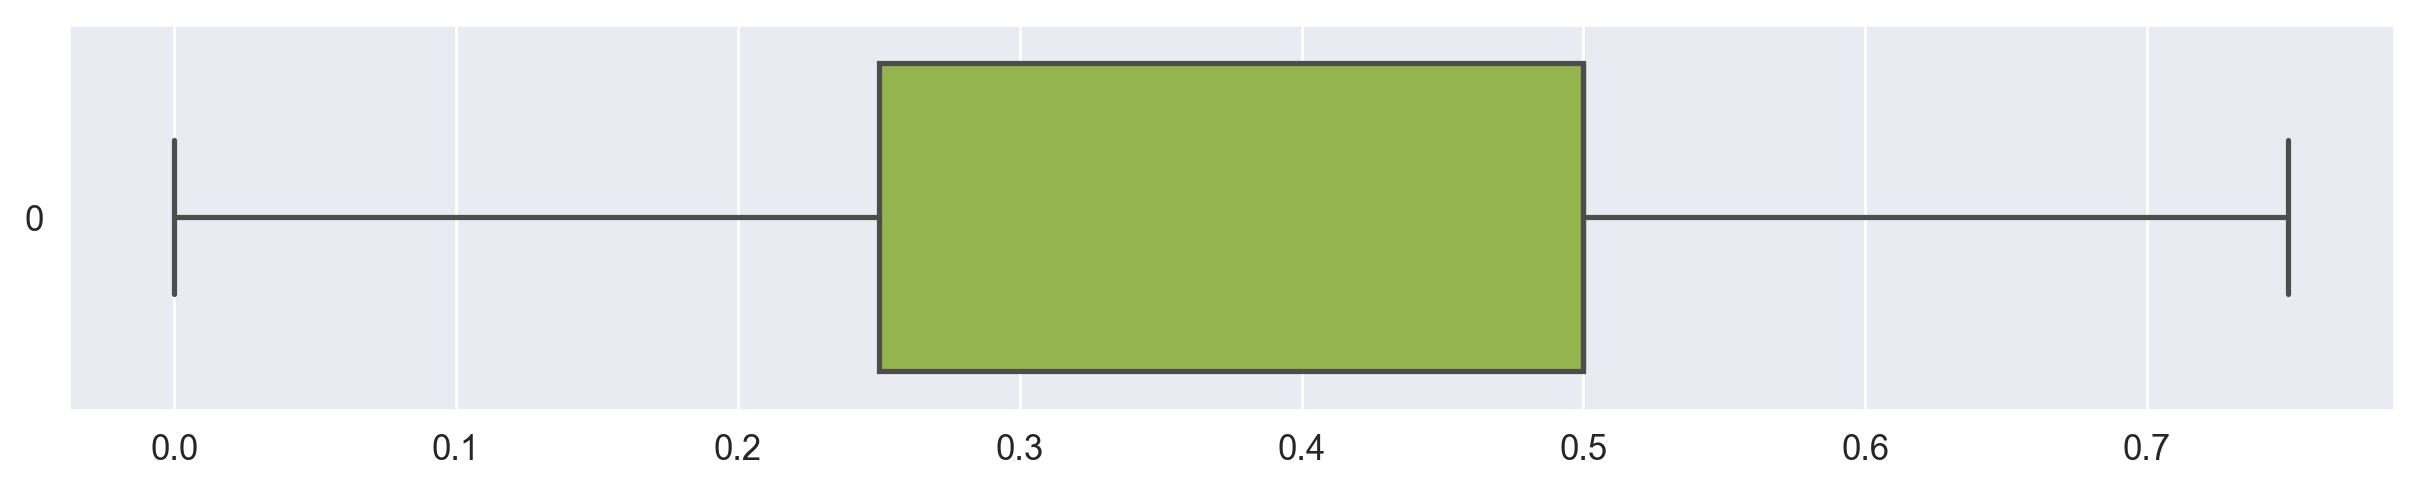

In [93]:
sns.boxplot(wby['honeybee'], orient = 'h', color = '#9bc53d')

In [94]:
lost_record()

We lost 0.05 % data


#### Removing Outlier in bumbles Column

<AxesSubplot:>

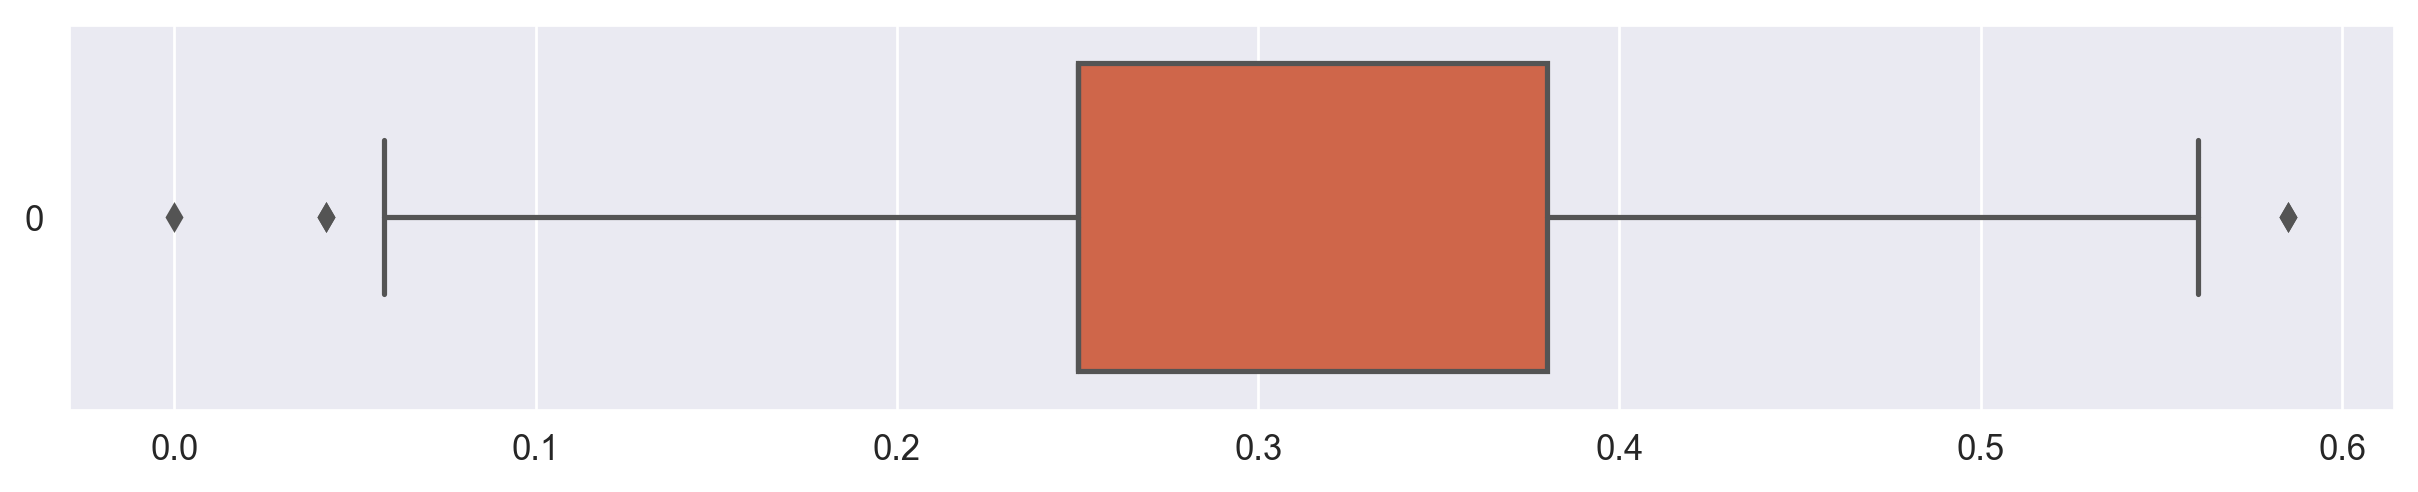

In [95]:
sns.boxplot(wby['bumbles'], orient = 'h', color = '#e55934')

In [96]:
wby = remove_outlier(wby, 'bumbles')

<AxesSubplot:>

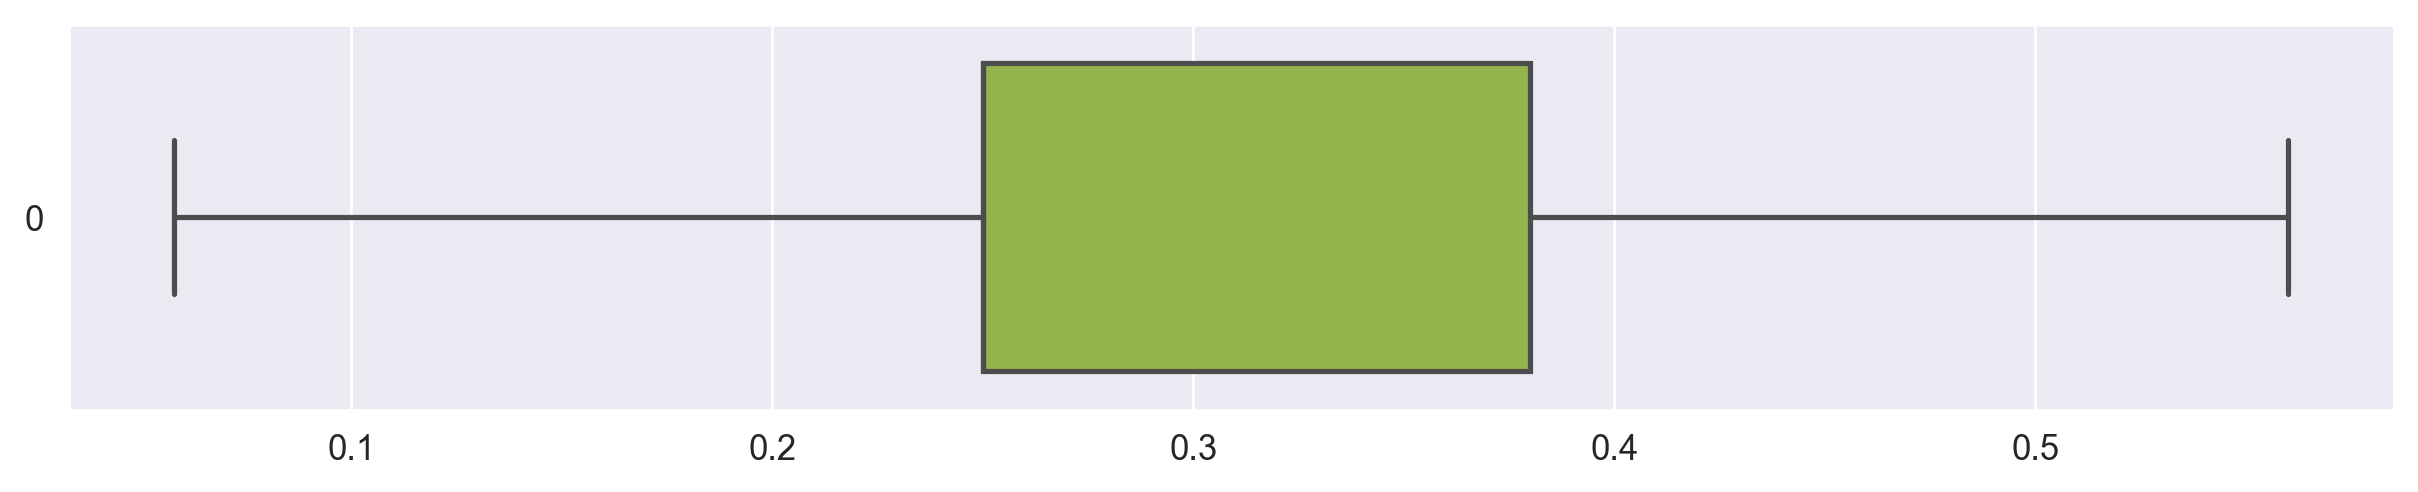

In [97]:
sns.boxplot(wby['bumbles'], orient = 'h', color = '#9bc53d')

In [98]:
lost_record()

We lost 0.09 % data


#### Removing Outlier in andrena Column

<AxesSubplot:>

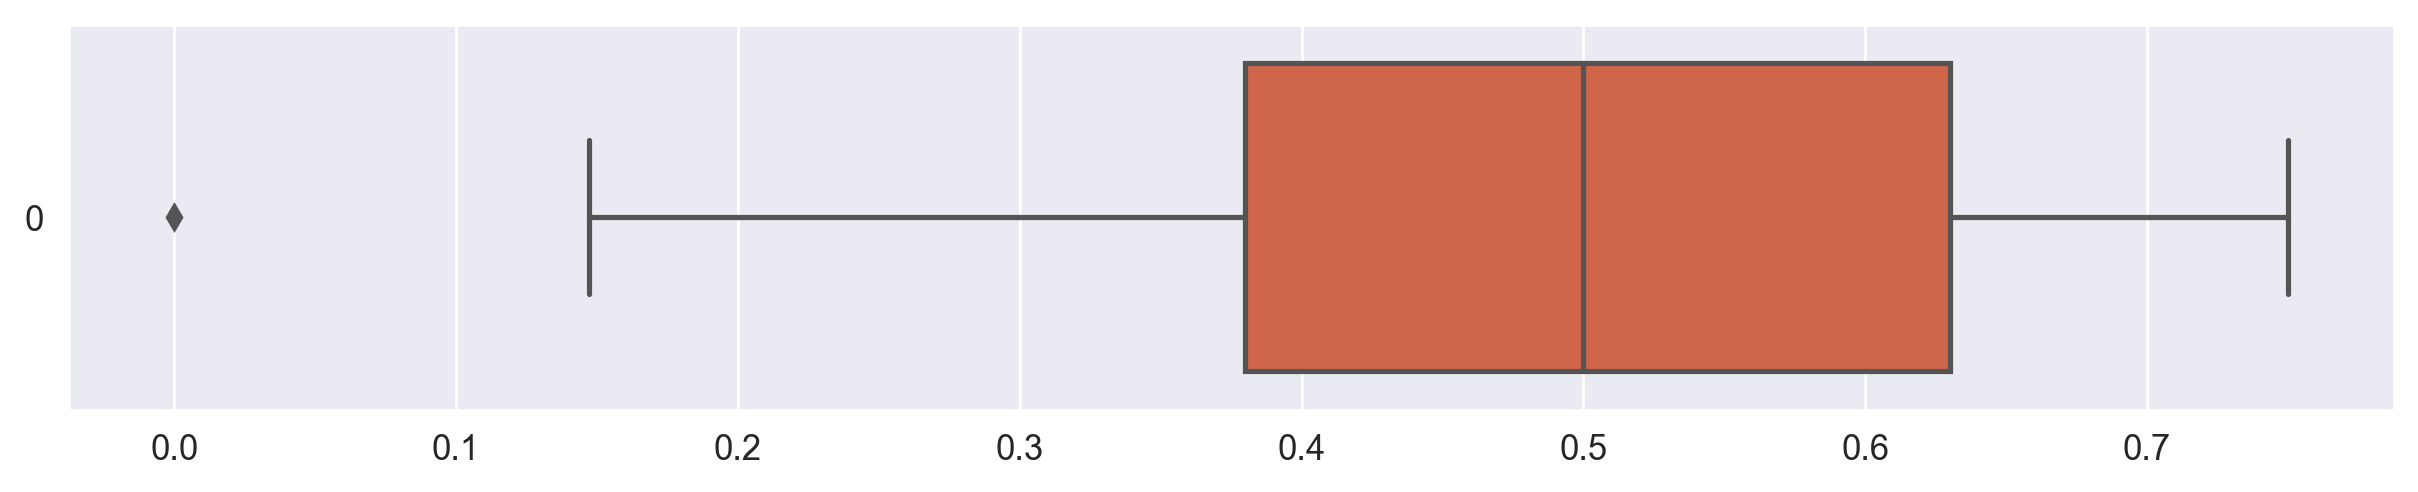

In [99]:
sns.boxplot(wby['andrena'], orient = 'h', color = '#e55934')

In [100]:
wby = remove_outlier(wby, 'andrena')

<AxesSubplot:>

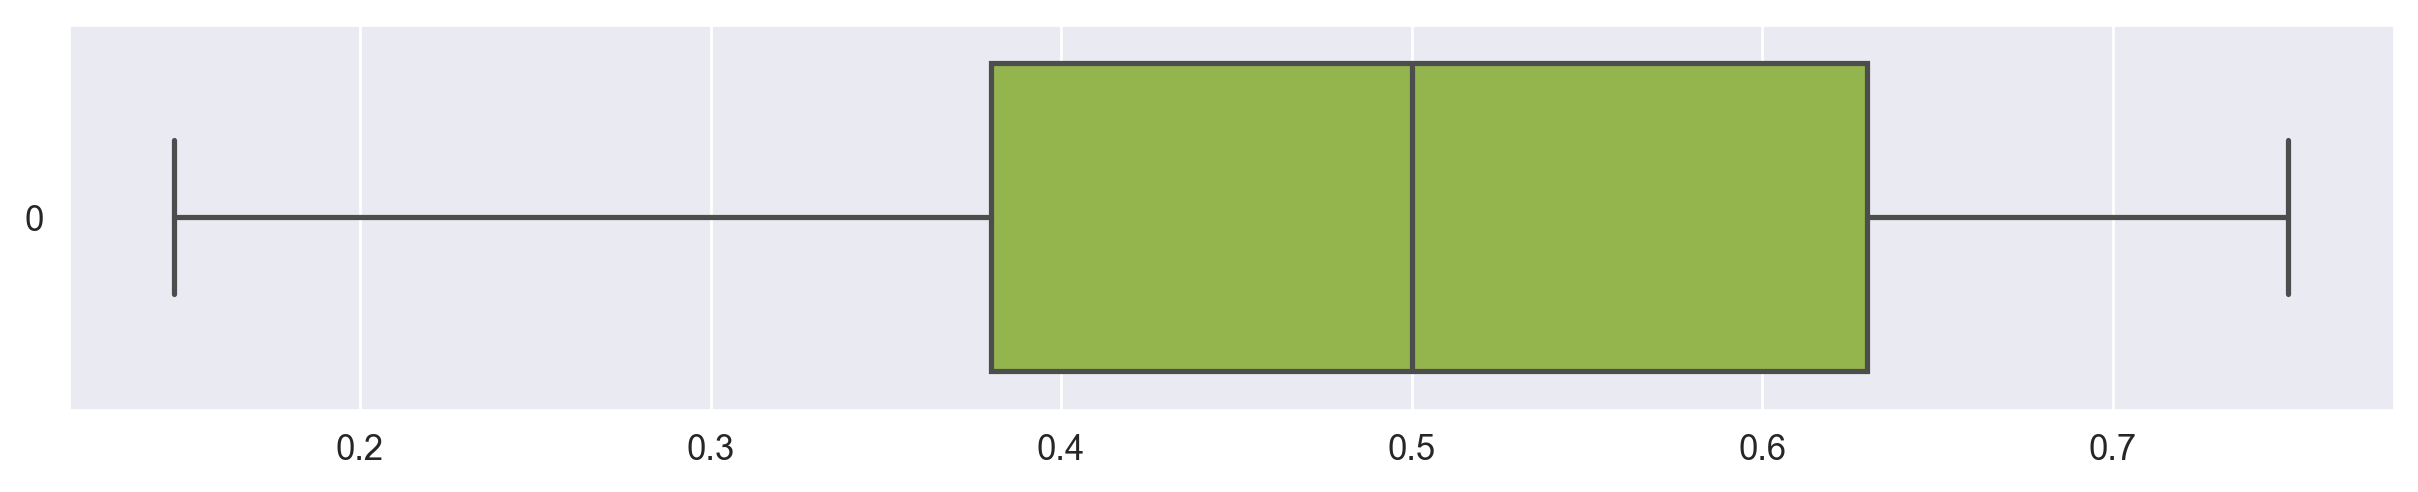

In [101]:
sns.boxplot(wby['andrena'], orient = 'h', color = '#9bc53d')

In [102]:
lost_record()

We lost 0.09 % data


#### Removing Outlier in osmia Column

<AxesSubplot:>

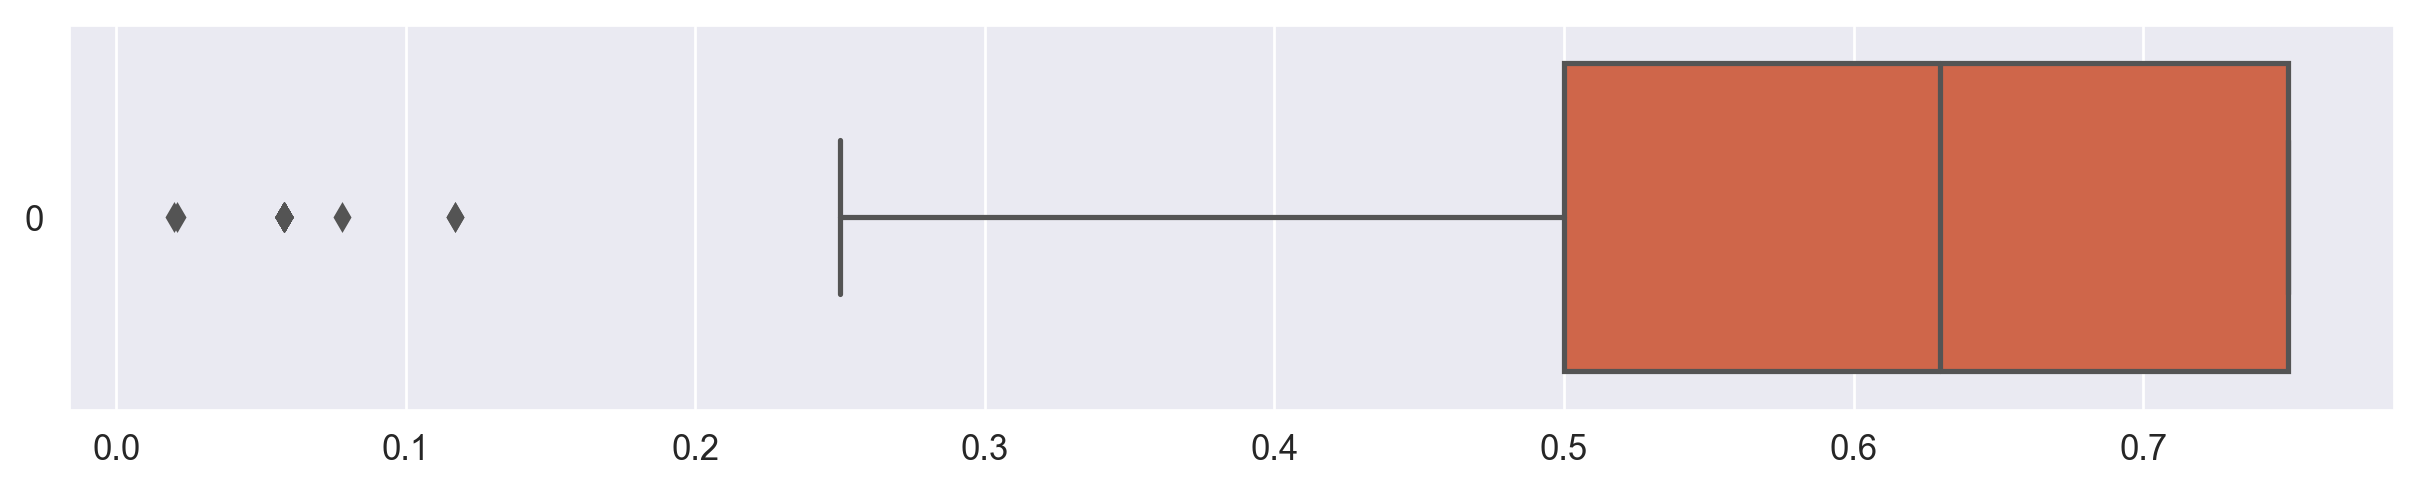

In [103]:
sns.boxplot(wby['osmia'], orient = 'h', color = '#e55934')

In [104]:
wby = remove_outlier(wby, 'osmia')

<AxesSubplot:>

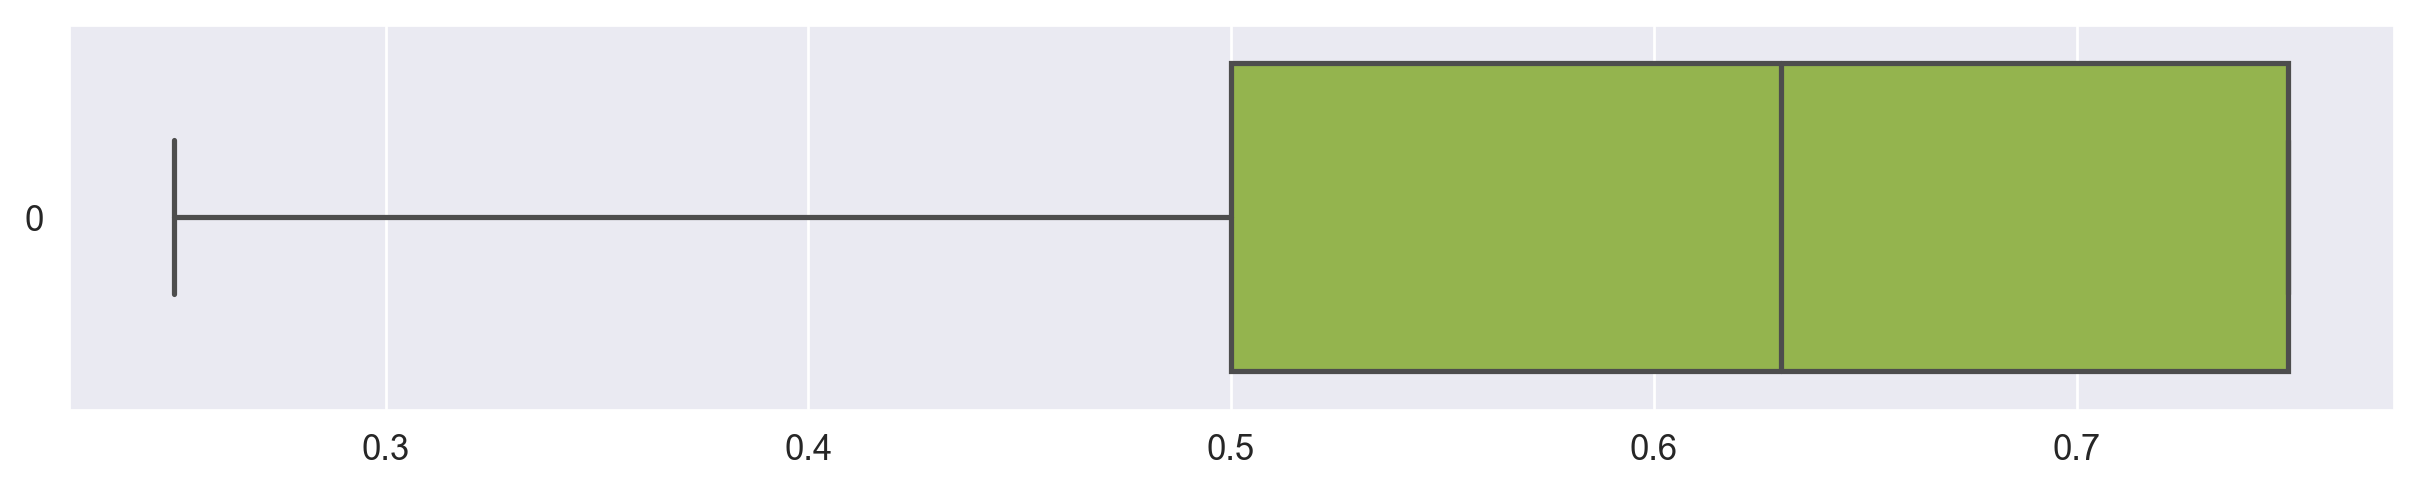

In [105]:
sns.boxplot(wby['osmia'], orient = 'h', color = '#9bc53d')

In [106]:
lost_record()

We lost 0.39 % data


#### Removing Outlier in AverageRainingDays Column

<AxesSubplot:>

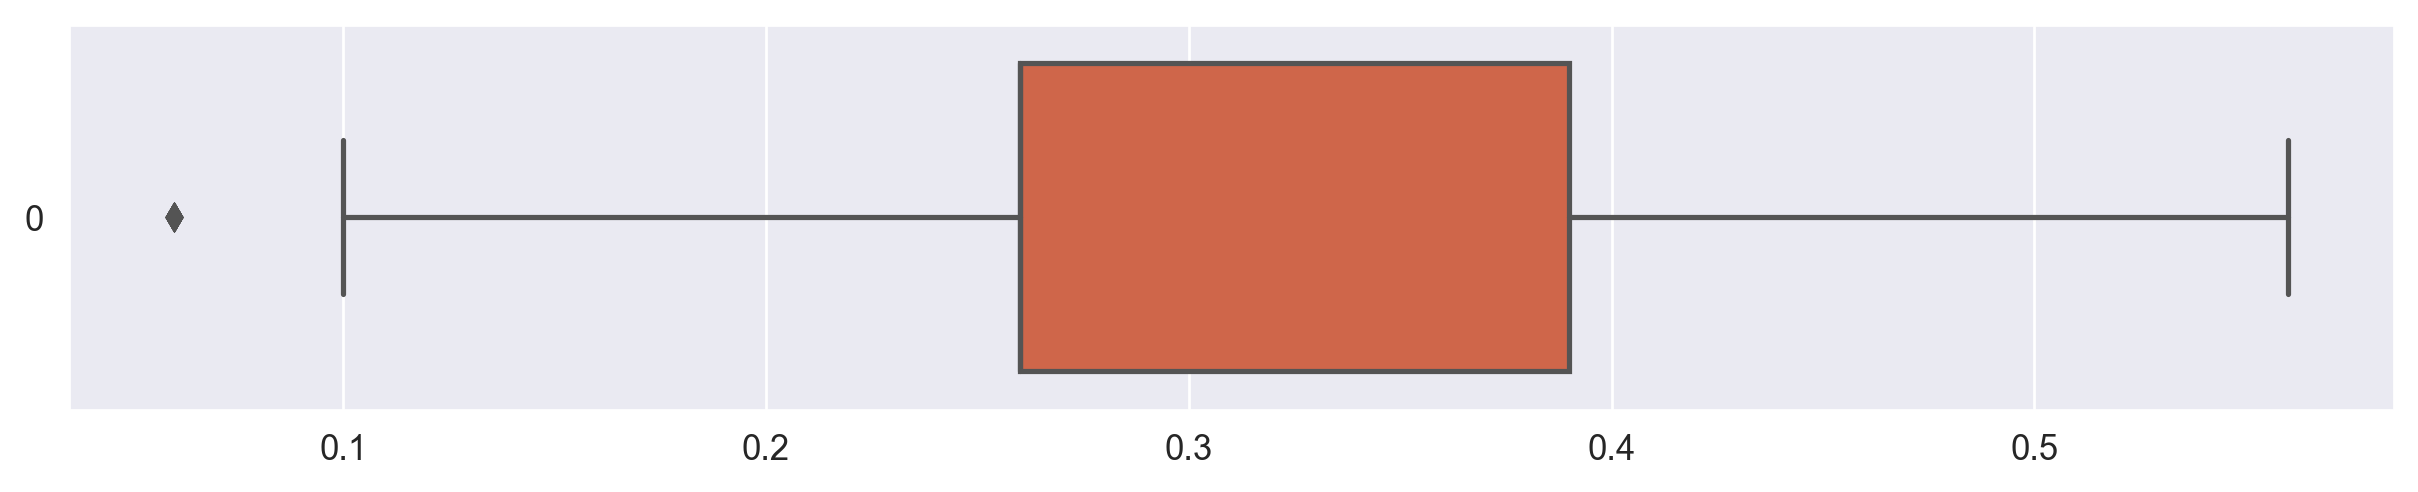

In [107]:
sns.boxplot(wby['AverageRainingDays'], orient = 'h', color = '#e55934')

In [108]:
wby = remove_outlier(wby, 'AverageRainingDays')

<AxesSubplot:>

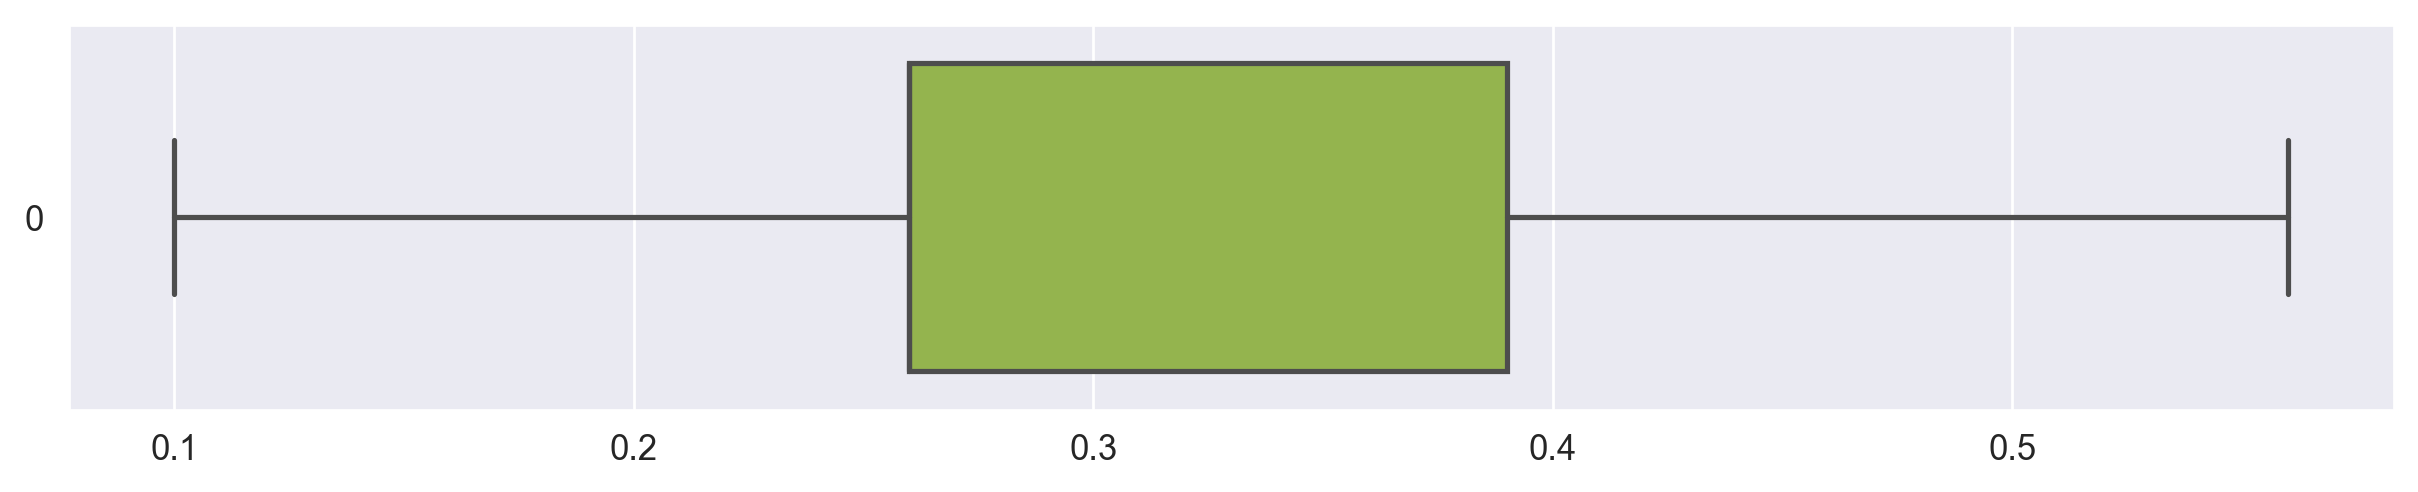

In [109]:
sns.boxplot(wby['AverageRainingDays'], orient = 'h', color = '#9bc53d')

In [110]:
lost_record()

We lost 0.49 % data


#### Removing Outlier in fruitset Column

<AxesSubplot:>

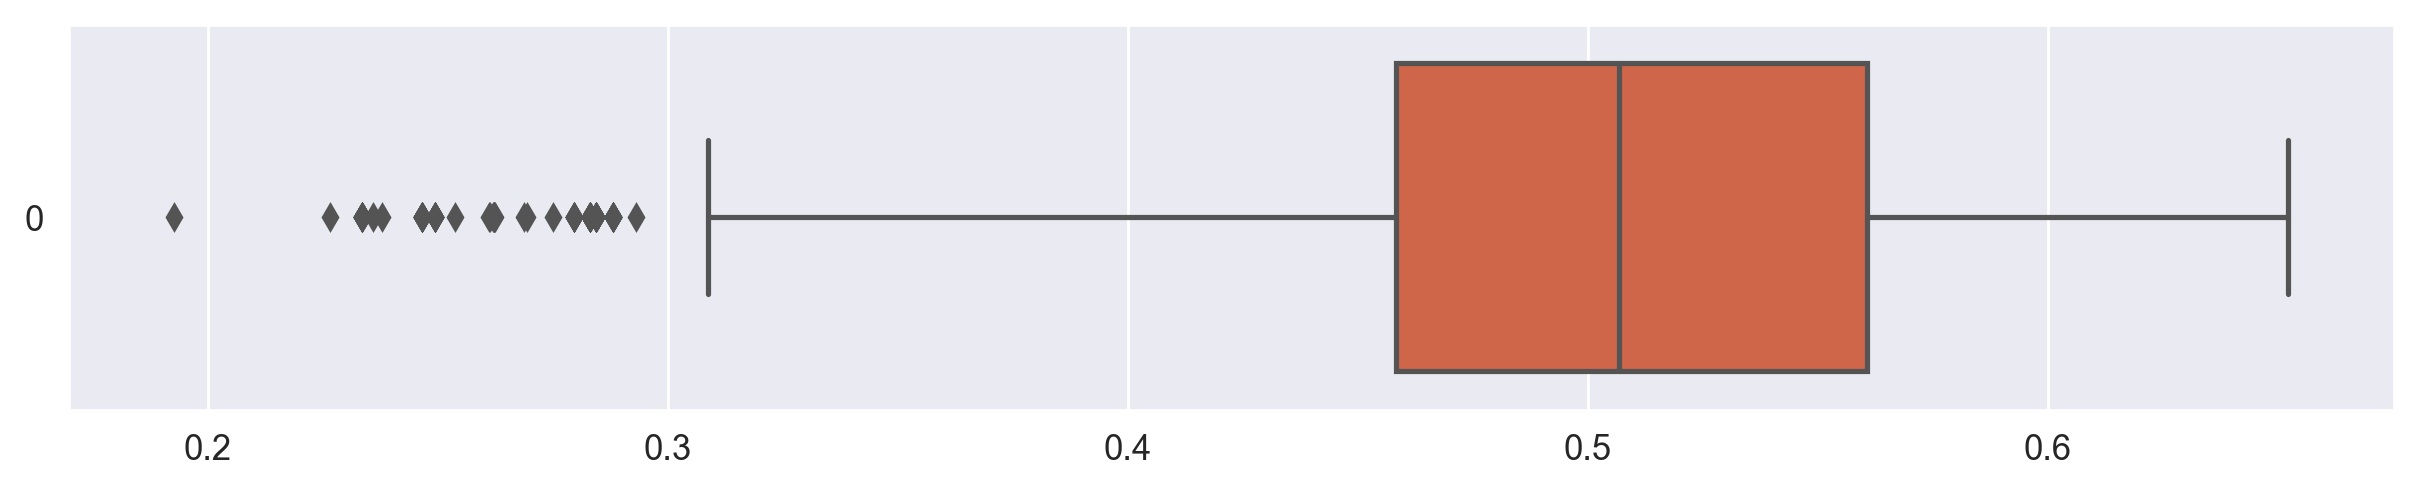

In [111]:
sns.boxplot(wby['fruitset'], orient = 'h', color = '#e55934')

In [112]:
wby =remove_outlier(wby, 'fruitset')

<AxesSubplot:>

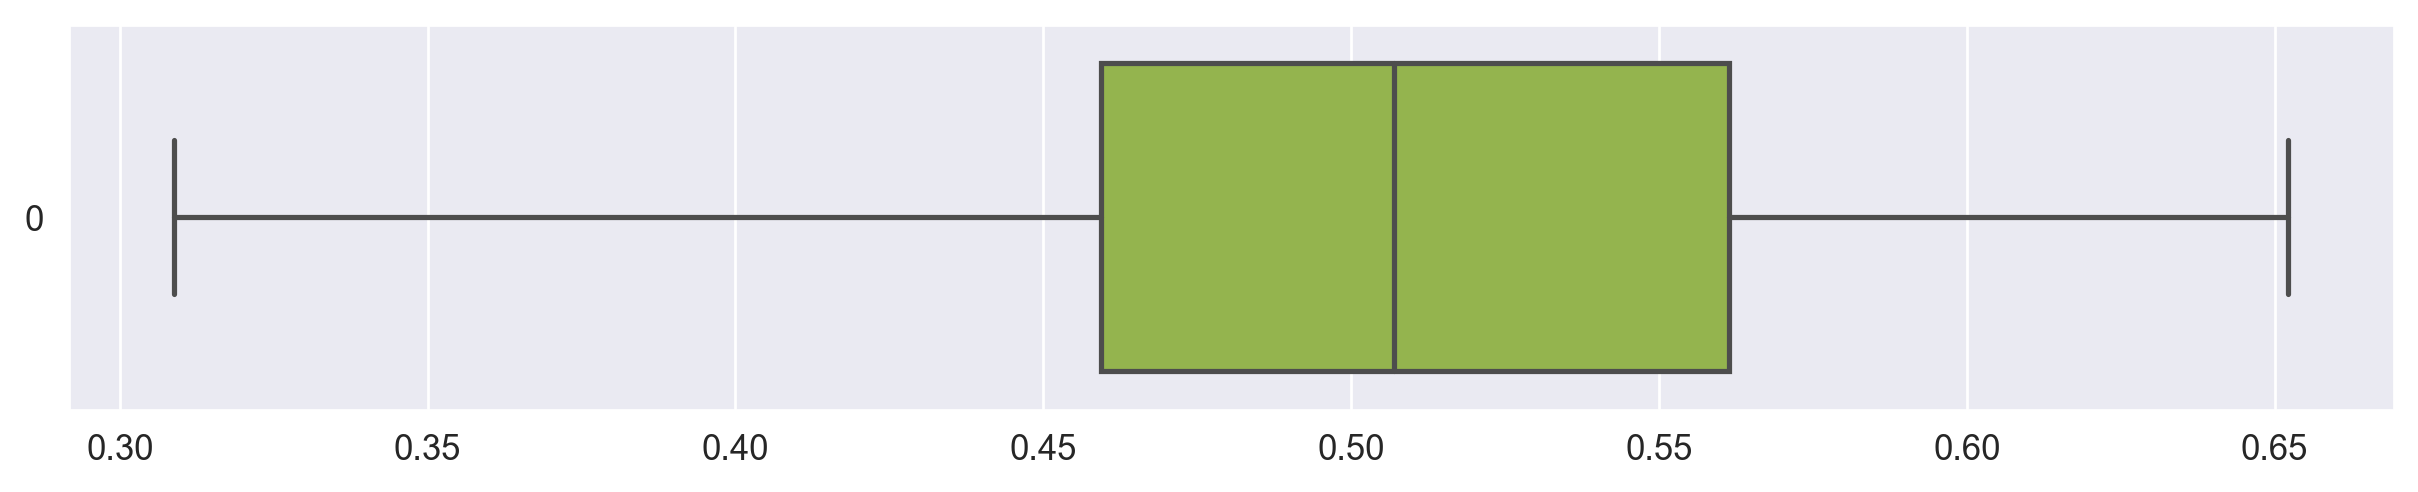

In [113]:
sns.boxplot(wby['fruitset'], orient = 'h', color = '#9bc53d')

In [114]:
lost_record()

We lost 1.11 % data


#### Removing Outlier in fruitmass Column

<AxesSubplot:>

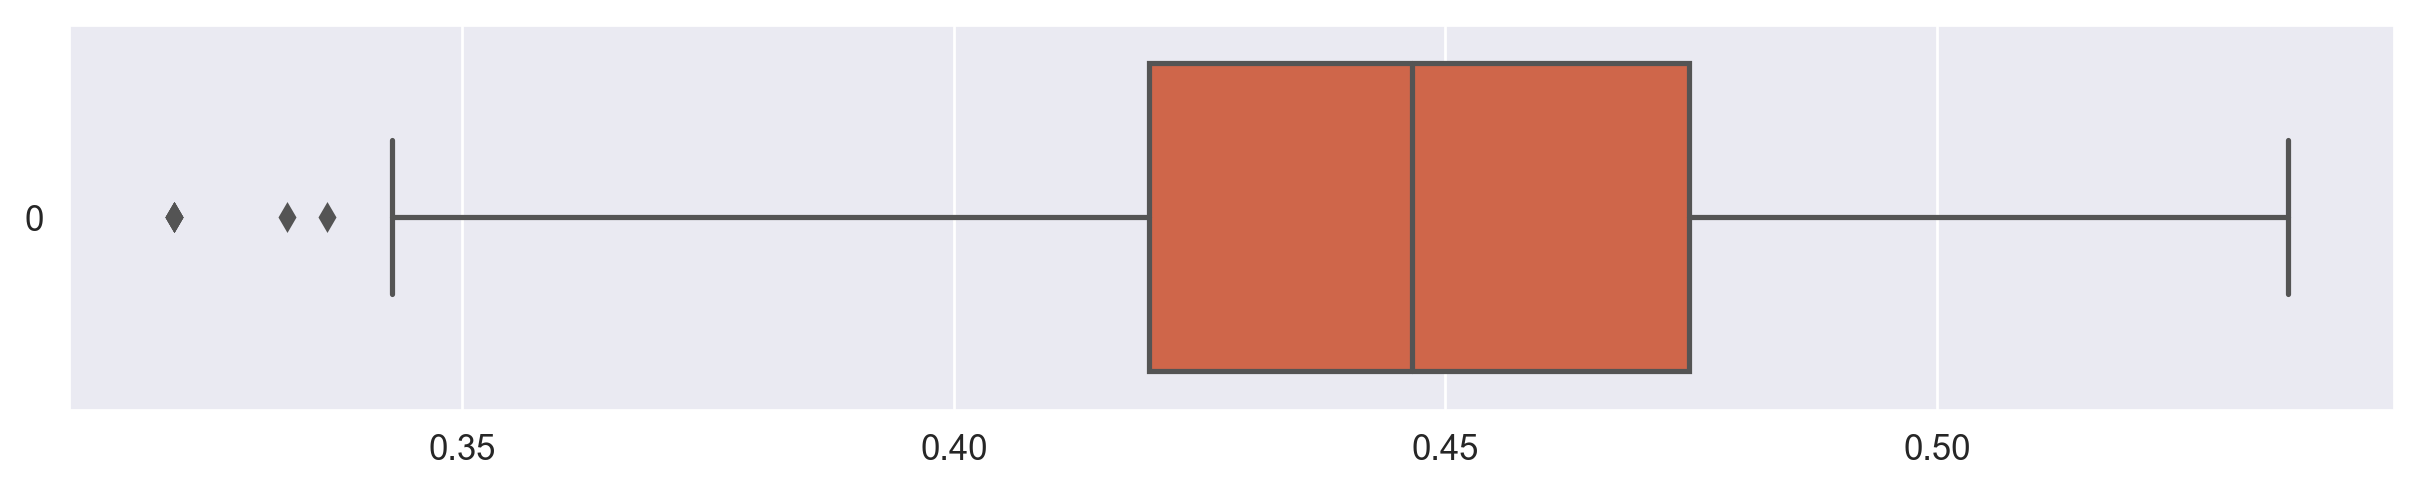

In [115]:
sns.boxplot(wby['fruitmass'], orient = 'h', color = '#e55934')

In [116]:
wby = remove_outlier(wby, 'fruitmass')

<AxesSubplot:>

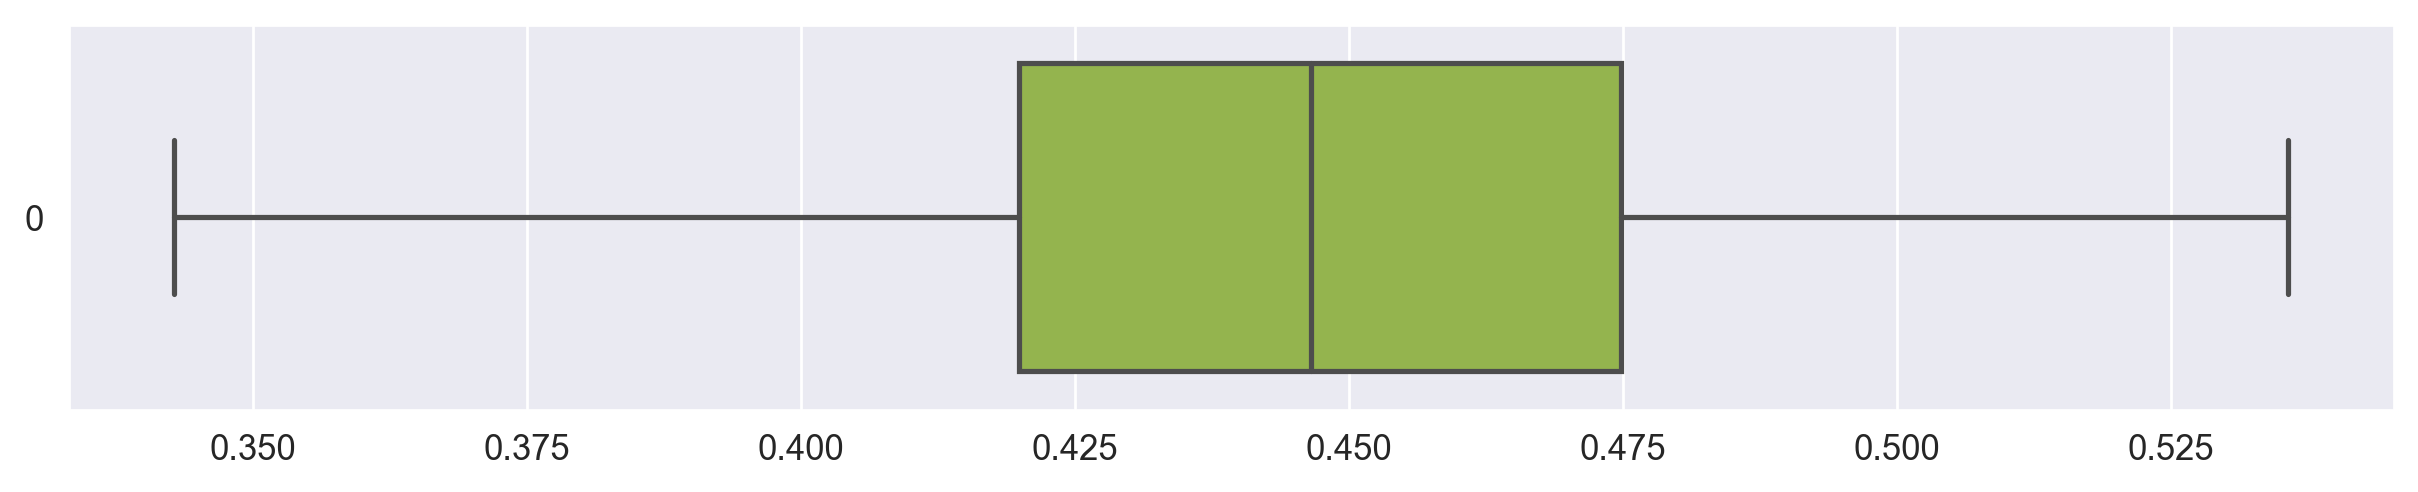

In [117]:
sns.boxplot(wby['fruitmass'], orient = 'h', color = '#9bc53d')

In [118]:
lost_record()

We lost 1.15 % data


#### Removing Outlier in seeds Column

<AxesSubplot:>

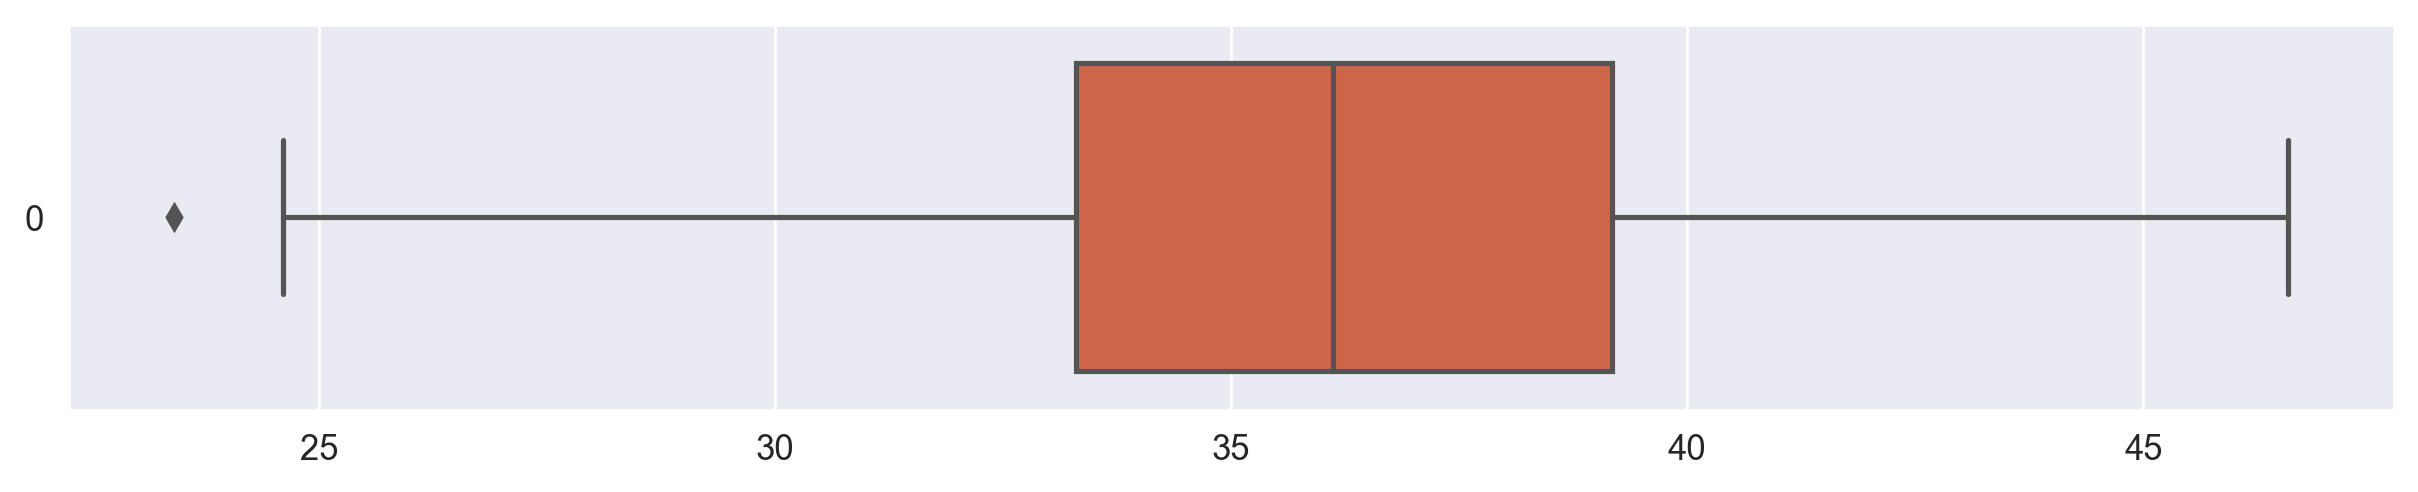

In [119]:
sns.boxplot(wby['seeds'], orient = 'h', color = '#e55934')

In [120]:
wby = remove_outlier(wby, 'seeds')

<AxesSubplot:>

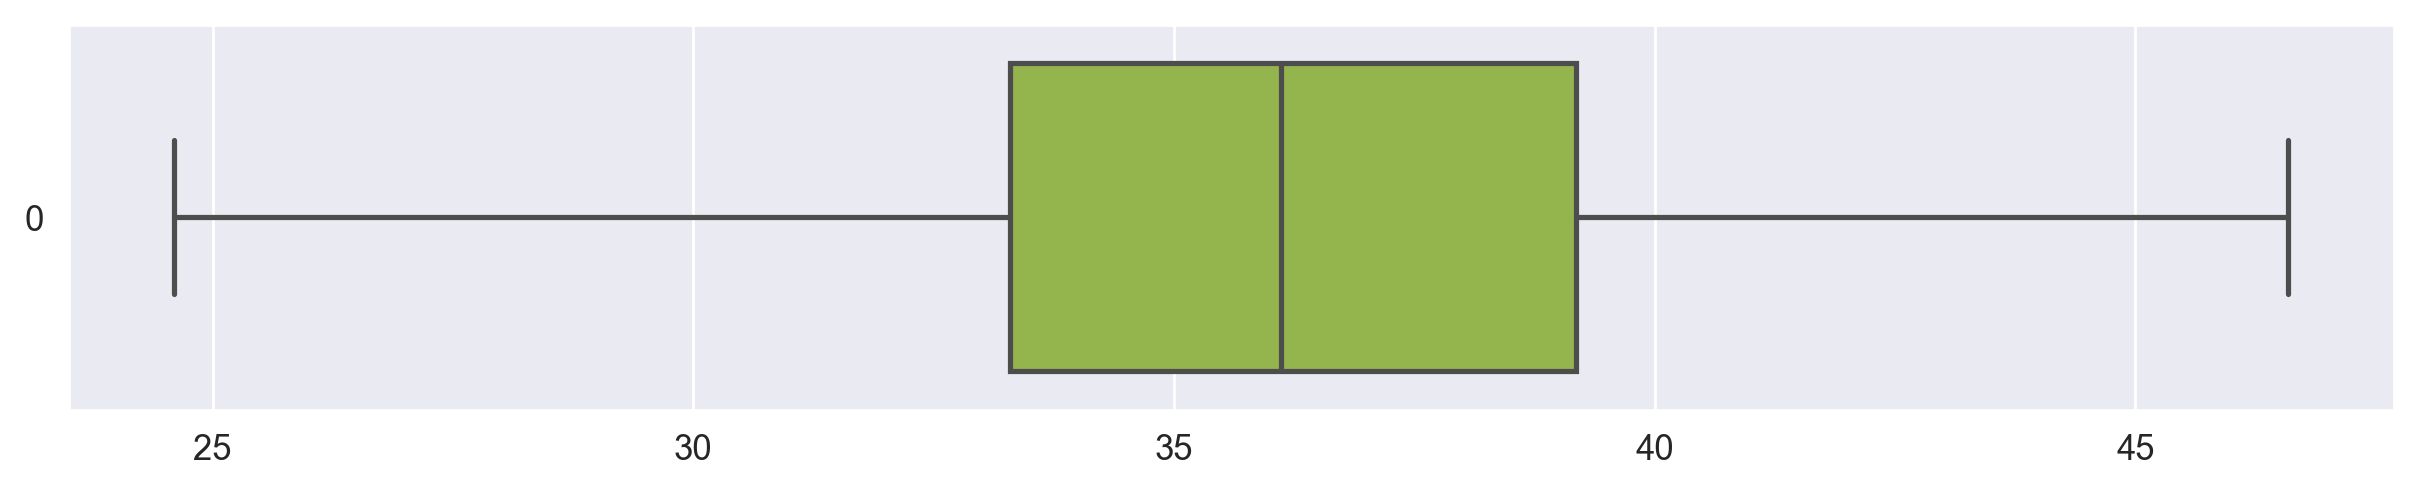

In [121]:
sns.boxplot(wby['seeds'], orient = 'h', color = '#9bc53d')

In [122]:
lost_record()

We lost 1.16 % data


#### Outlier Percentage (After)

In [123]:
outlier_percentage(wby)

clonesize : 0.0 %
honeybee : 0.0 %
bumbles : 0.0 %
andrena : 0.0 %
osmia : 0.0 %
MaxOfUpperTRange : 0.0 %
MinOfUpperTRange : 0.0 %
AverageOfUpperTRange : 0.0 %
MaxOfLowerTRange : 0.0 %
MinOfLowerTRange : 0.0 %
AverageOfLowerTRange : 0.0 %
RainingDays : 0.0 %
AverageRainingDays : 0.0 %
fruitset : 0.0 %
fruitmass : 0.0 %
seeds : 0.0 %
yield : 0.12 %


#### Reindexing Columns

In [124]:
wby.reset_index(inplace=True)
wby.drop(columns=['index'], inplace=True)

wby

clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0           25.0      0.50     0.25     0.75   0.50              69.7   
1           25.0      0.50     0.25     0.50   0.50              69.7   
2           12.5      0.25     0.25     0.63   0.63              86.0   
3           12.5      0.25     0.25     0.63   0.50              77.4   
4           25.0      0.50     0.25     0.63   0.63              77.4   
...          ...       ...      ...      ...    ...               ...   
15106       12.5      0.25     0.25     0.38   0.50              77.4   
15107       12.5      0.25     0.25     0.25   0.50              86.0   
15108       25.0      0.50     0.25     0.38   0.75              77.4   
15109       25.0      0.50     0.25     0.63   0.63              69.7   
15110       25.0      0.50     0.25     0.63   0.50              77.4   

       MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
0                  42.1                  58.2              50.2   
1                  42.1                  58.2              50.2   
2                  52.0                  71.9              62.0   
3                  46.8                  64.7              55.8   
4                  46.8                  64.7              55.8   
...                 ...                   ...               ...   
15106              46.8                  64.7              55.8   
15107              52.0                  71.9              62.0   
15108              46.8                  64.7              55.8   
15109              42.1                  58.2              50.2   
15110              46.8                  64.7              55.8   

       MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
0                  24.3                  41.2         24.0   
1                  24.3                  41.2         24.0   
2                  30.0                  50.8         24.0   
3                  27.0                  45.8         24.0   
4                  27.0                  45.8         24.0   
...                 ...                   ...          ...   
15106              27.0                  45.8         16.0   
15107              30.0                  50.8         34.0   
15108              27.0                  45.8         34.0   
15109              24.3                  41.2         24.0   
15110              27.0                  45.8         16.0   

       AverageRainingDays  fruitset  fruitmass      seeds       yield  
0                    0.39  0.425011   0.417545  32.460887  4476.81146  
1                    0.39  0.444908   0.422051  33.858317  5548.12201  
2                    0.39  0.552927   0.470853  38.341781  6869.77760  
3                    0.39  0.565976   0.478137  39.467561  6880.77590  
4                    0.39  0.579677   0.494165  40.484512  7479.93417  
...                   ...       ...        ...        ...         ...  
15106                0.26  0.556302   0.476308  40.546480  7667.83619  
15107                0.56  0.354413   0.388145  29.467434  3680.56025  
15108                0.56  0.422548   0.416786  32.299059  4696.44394  
15109                0.39  0.542170   0.434133  36.674243  6772.93347  
15110                0.26  0.492077   0.446576  35.094733  5867.99722  

[15111 rows x 17 columns]

## Exporting Dataframe

In [126]:
wby.to_csv('EDA.csv', index=False)